<a href="https://colab.research.google.com/github/Sardaar2003/GFG_Data_Science_Course_Assignment/blob/main/Linear_Regression_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from tqdm import tqdm

In [2]:
data=pd.read_csv('data_for_lr.csv')

In [3]:
data.head()

x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984

In [4]:
data.shape

(700, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [6]:
data.describe()

x           y
count   700.000000  699.000000
mean     54.985939   49.939869
std     134.681703   29.109217
min       0.000000   -3.839981
25%      25.000000   24.929968
50%      49.000000   48.973020
75%      75.000000   74.929911
max    3530.157369  108.871618

## Data Processing

In [7]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.shape

(699, 2)

## Spliting The data

In [10]:
train_input=np.array(data.x[0:500]).reshape(500,1)

In [11]:
train_output=np.array(data.y[:500]).reshape(500,1)

In [12]:
test_input=np.array(data.x[500:]).reshape(199,1)
test_output=np.array(data.y[500:]).reshape(199,1)

In [13]:
print("Shape : ",train_input.shape)
print("Shape : ",train_output.shape)
print("Shape : ",test_input.shape)
print("Shape : ",test_output.shape)

Shape :  (500, 1)
Shape :  (500, 1)
Shape :  (199, 1)
Shape :  (199, 1)


#<font color="green">Linear Regression</font>

## Forward Propagation

# F(x)=m*x+c

In [14]:
def forward_propagation(train_input,parameter):
  m=parameter["m"]
  c=parameter["c"]
  predict=np.multiply(train_input,m)+c
  return predict

## Cost Function

In [15]:
def cost_function(train_output,predict):
  cost=np.mean((train_output-predict)**2)/2
  return cost

## Gradient Descent

In [16]:
def backward_propagation(train_input,train_output,predict):
  derivates=dict()
  df=(predict-train_output)
  dm=np.mean(np.multiply(df,train_input))
  dc=np.mean(df)
  derivates["dm"]=dm
  derivates["dc"]=dc
  return derivates

## Updating Parameters

In [17]:
def update_param(parameter,derivates,learning_rate):
  parameter["m"]=parameter["m"]-learning_rate*derivates["dm"]
  parameter["c"]=parameter["c"]-learning_rate*derivates["dc"]
  return parameter

## Model Training

In [18]:
def train(train_input,train_output,learning_rate,iter):
  # Random Parameter
  parameter=dict()
  parameter["m"]=np.random.uniform(0,1)
  parameter["c"]=np.random.uniform(0,1)
  plt.figure()
  loss=list()
  for i in tqdm(range(iter)):
    predict=forward_propagation(train_input,parameter)
    cst=cost_function(train_output,predict)
    loss.append(cst)
    print(f"Loss at the {i+1} iteration is {cst}")
    fig,ax=plt.subplots()
    ax.plot(train_input,train_output,"+",label="Original Data")
    ax.plot(train_input,predict,"*",label="Predict Data")
    legend=ax.legend()
    plt.plot(train_input,train_output,"+",label="Original Data")
    plt.plot(train_input,predict,"*",label="Predict Data")
    plt.show()
    derivate=backward_propagation(train_input,train_output,predict)
    parameter=update_param(parameter,derivate,learning_rate)
  return parameter,loss

## Training

  0%|          | 0/200 [00:00<?, ?it/s]

Loss at the 1 iteration is 485.4789036512506


<Figure size 640x480 with 0 Axes>

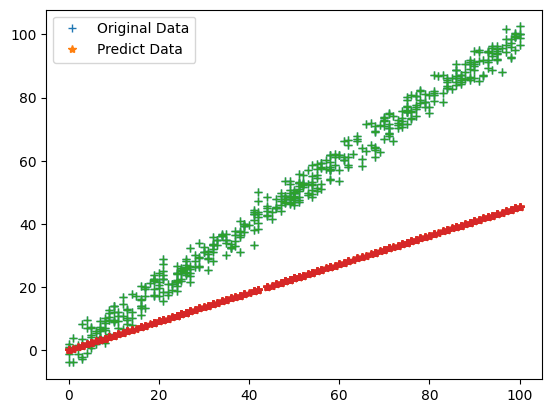

  0%|          | 1/200 [00:00<00:47,  4.21it/s]

Loss at the 2 iteration is 222.40805730703488


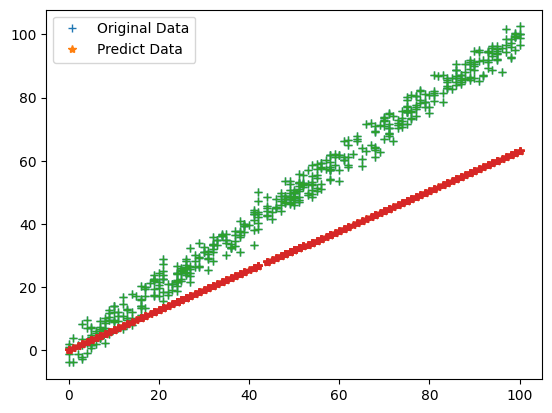

  1%|          | 2/200 [00:00<00:45,  4.31it/s]

Loss at the 3 iteration is 103.05252245322615


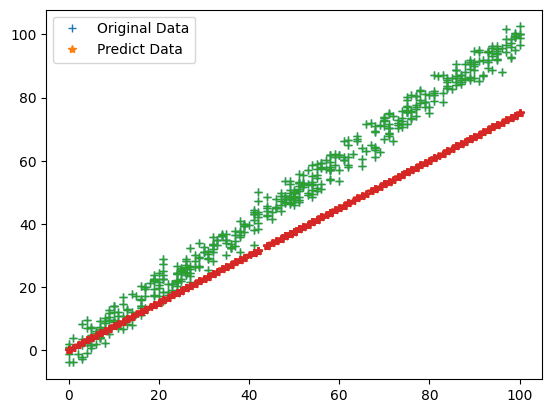

  2%|▏         | 3/200 [00:00<00:45,  4.29it/s]

Loss at the 4 iteration is 48.900783607641515


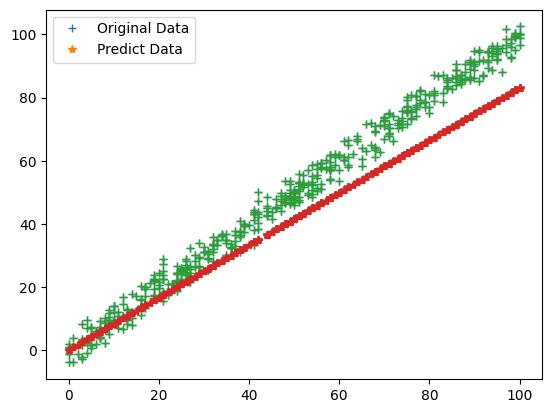

  2%|▏         | 4/200 [00:00<00:45,  4.30it/s]

Loss at the 5 iteration is 24.332079233423986


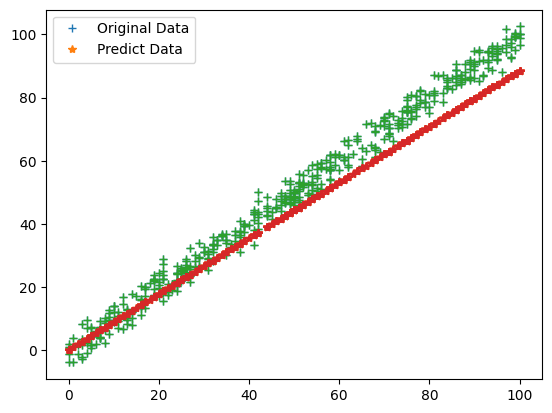

  2%|▎         | 5/200 [00:01<00:48,  3.99it/s]

Loss at the 6 iteration is 13.185230366278097


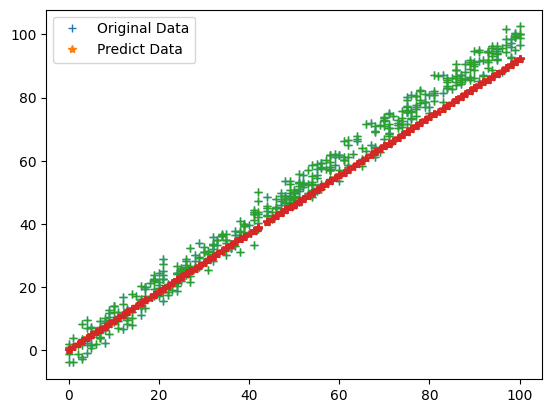

  3%|▎         | 6/200 [00:01<00:54,  3.59it/s]

Loss at the 7 iteration is 8.127892209315085


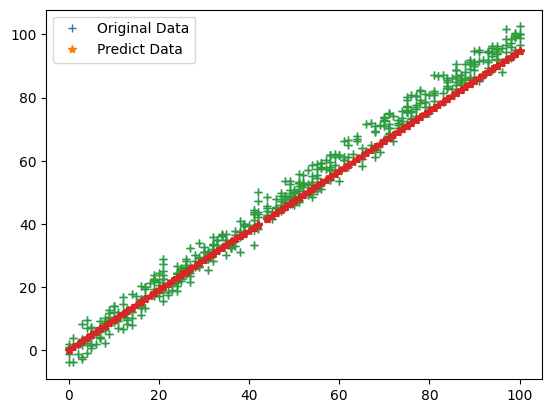

  4%|▎         | 7/200 [00:01<00:53,  3.60it/s]

Loss at the 8 iteration is 5.833371806579216


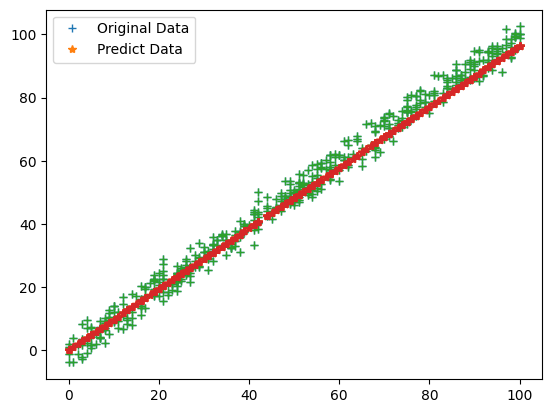

  4%|▍         | 8/200 [00:02<00:50,  3.78it/s]

Loss at the 9 iteration is 4.792344879171151


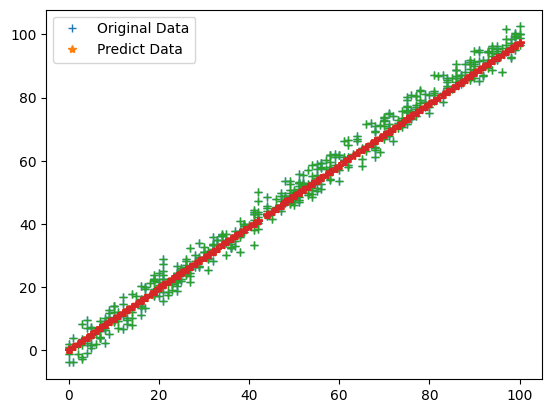

  4%|▍         | 9/200 [00:02<01:26,  2.21it/s]

Loss at the 10 iteration is 4.3200293299644805


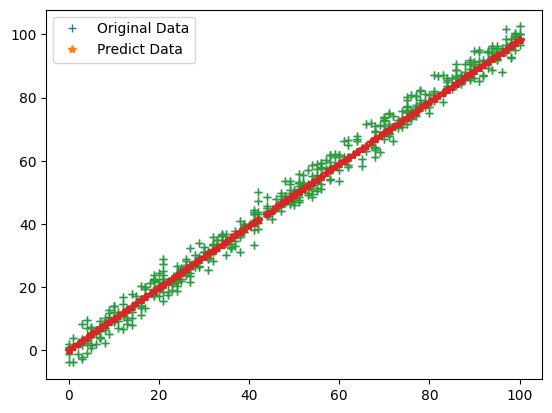

  5%|▌         | 10/200 [00:03<01:20,  2.37it/s]

Loss at the 11 iteration is 4.105738763000089


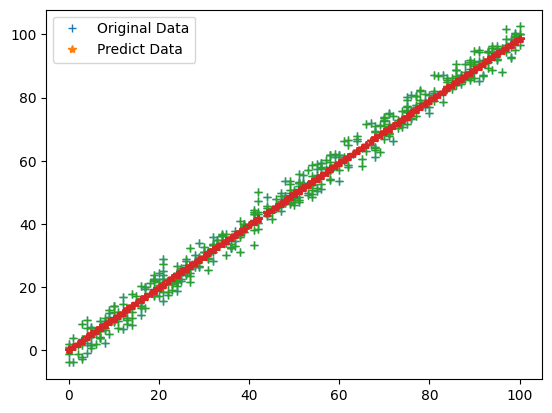

  6%|▌         | 11/200 [00:03<01:13,  2.56it/s]

Loss at the 12 iteration is 4.008514416302257


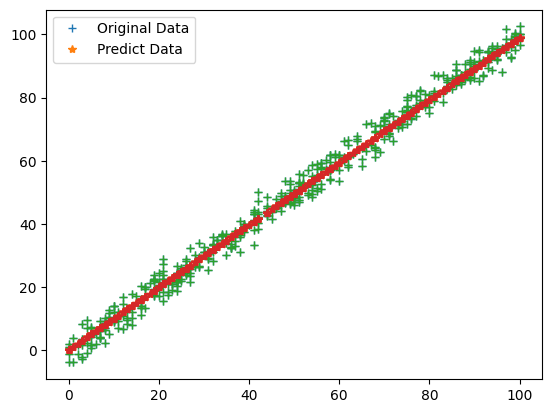

  6%|▌         | 12/200 [00:03<01:09,  2.71it/s]

Loss at the 13 iteration is 3.9644031434308644


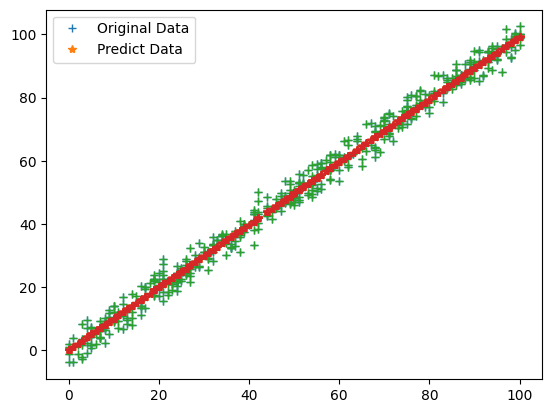

  6%|▋         | 13/200 [00:04<01:07,  2.79it/s]

Loss at the 14 iteration is 3.9443893310088907


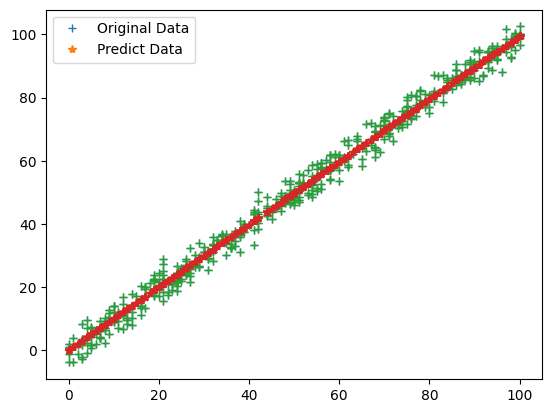

  7%|▋         | 14/200 [00:04<01:13,  2.52it/s]

Loss at the 15 iteration is 3.935308563108293


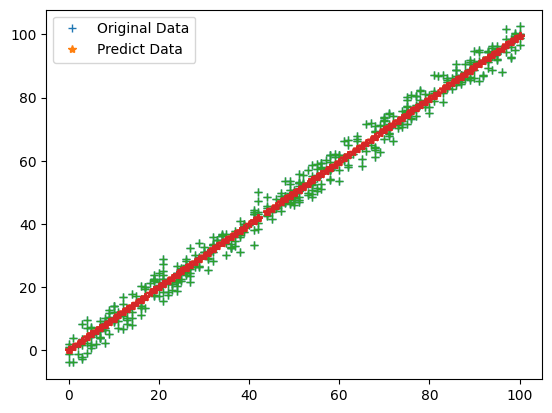

  8%|▊         | 15/200 [00:05<01:10,  2.61it/s]

Loss at the 16 iteration is 3.9311881296410656


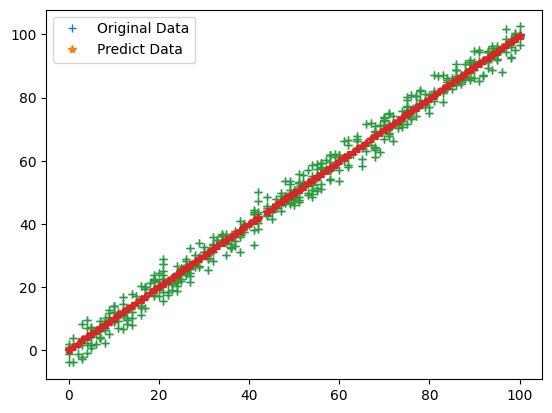

  8%|▊         | 16/200 [00:05<01:02,  2.96it/s]

Loss at the 17 iteration is 3.929318205424656


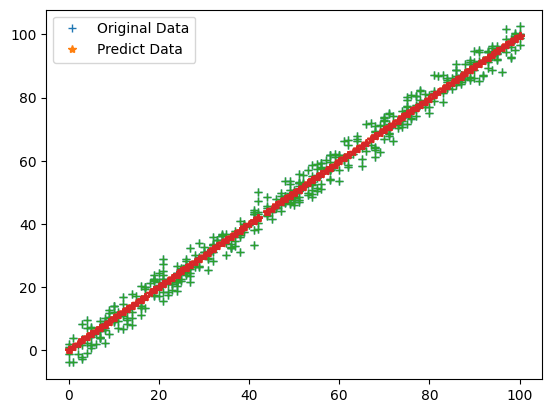

  8%|▊         | 17/200 [00:05<00:56,  3.25it/s]

Loss at the 18 iteration is 3.9284693397722283


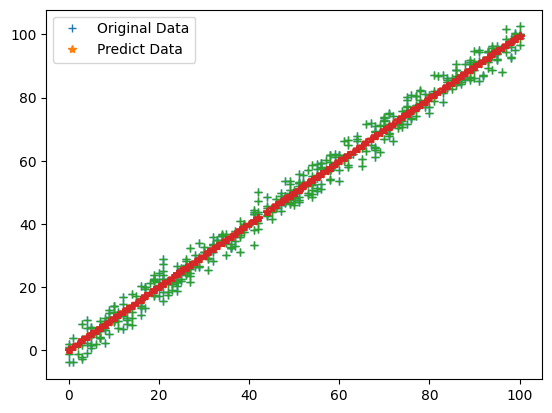

  9%|▉         | 18/200 [00:05<00:51,  3.53it/s]

Loss at the 19 iteration is 3.928083729545373


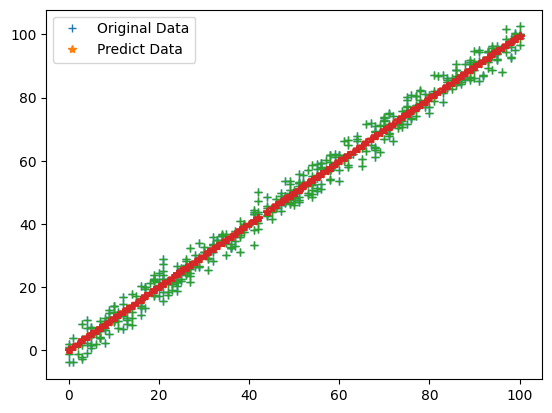

 10%|▉         | 19/200 [00:06<00:50,  3.61it/s]

Loss at the 20 iteration is 3.927908298842346


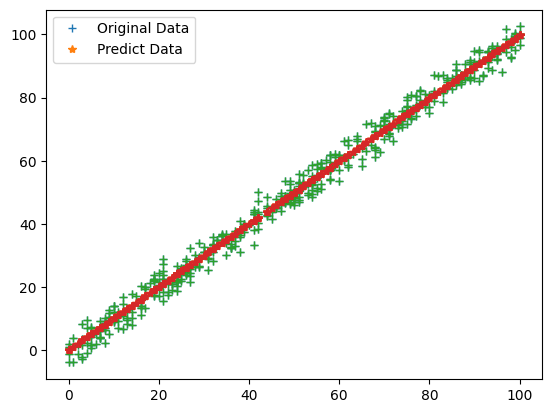

 10%|█         | 20/200 [00:06<00:47,  3.76it/s]

Loss at the 21 iteration is 3.927828226846209


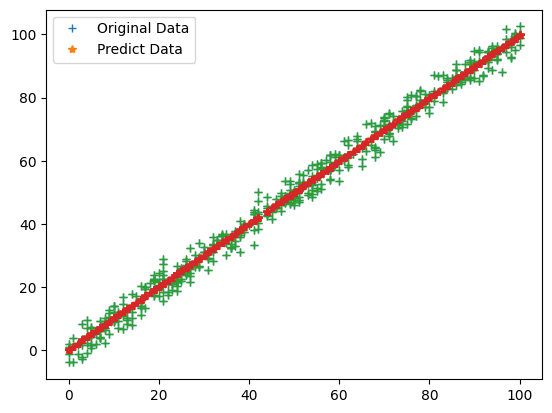

 10%|█         | 21/200 [00:06<00:46,  3.89it/s]

Loss at the 22 iteration is 3.9277914192251333


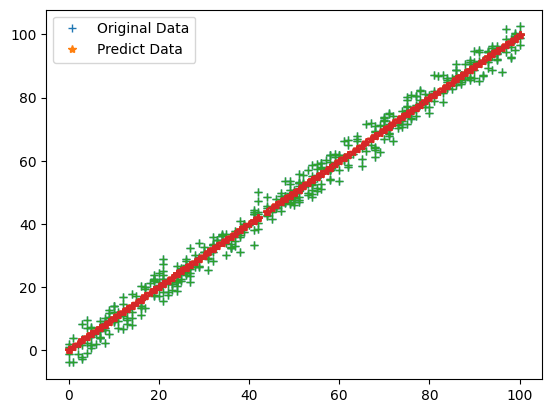

 11%|█         | 22/200 [00:06<00:44,  3.96it/s]

Loss at the 23 iteration is 3.927774240723067


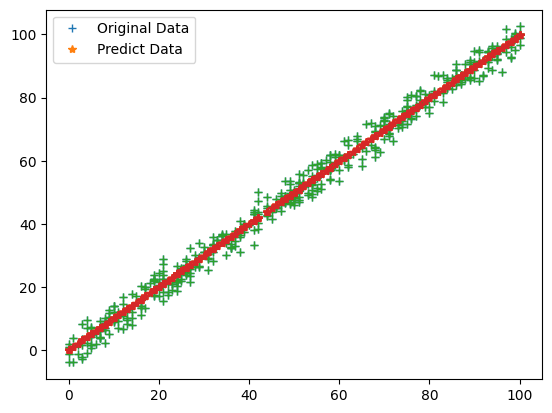

 12%|█▏        | 23/200 [00:07<00:43,  4.05it/s]

Loss at the 24 iteration is 3.927765967998159


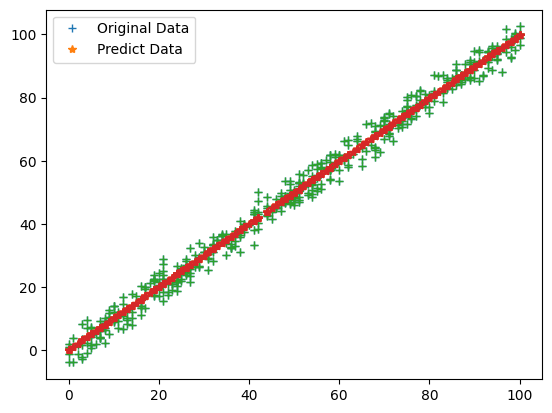

 12%|█▏        | 24/200 [00:07<00:43,  4.07it/s]

Loss at the 25 iteration is 3.927761735858331


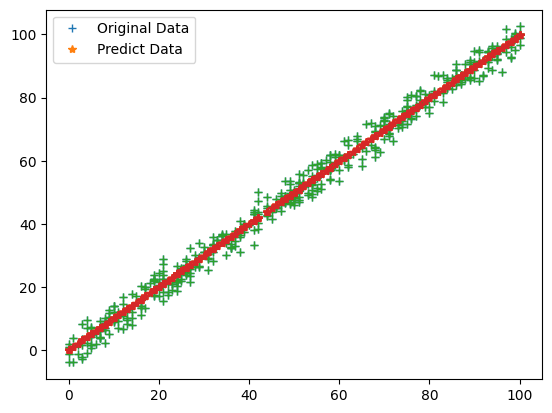

 12%|█▎        | 25/200 [00:07<00:44,  3.97it/s]

Loss at the 26 iteration is 3.9277593369605475


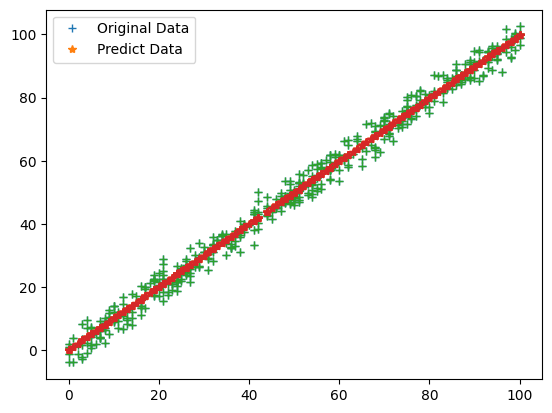

 13%|█▎        | 26/200 [00:07<00:44,  3.91it/s]

Loss at the 27 iteration is 3.9277577698308286


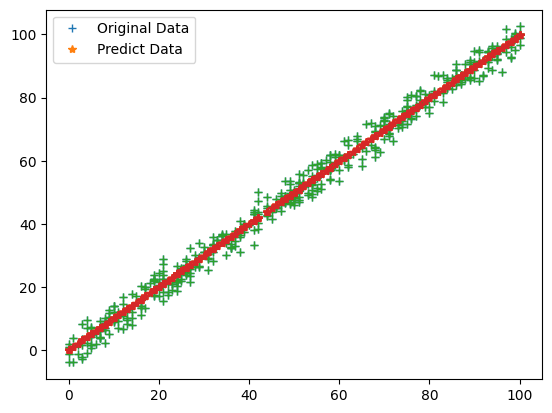

 14%|█▎        | 27/200 [00:08<00:48,  3.55it/s]

Loss at the 28 iteration is 3.927756580099317


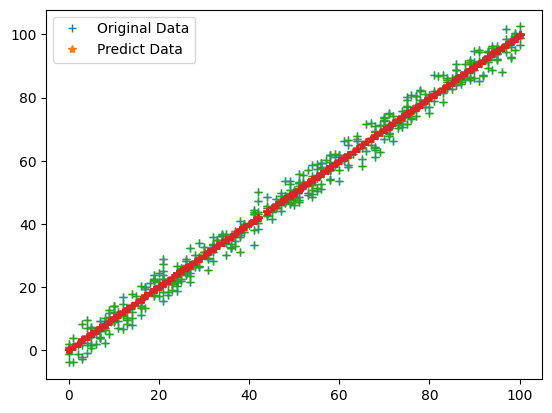

 14%|█▍        | 28/200 [00:08<00:56,  3.06it/s]

Loss at the 29 iteration is 3.9277555616179054


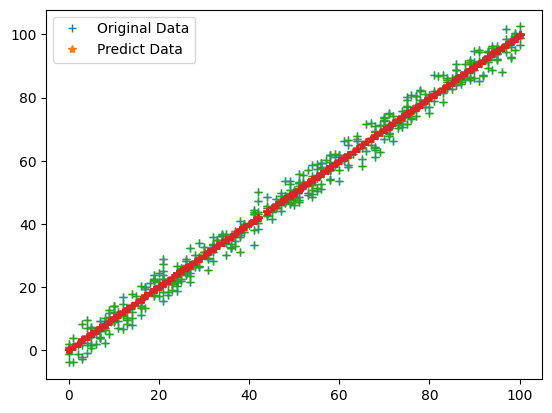

 14%|█▍        | 29/200 [00:10<02:00,  1.42it/s]

Loss at the 30 iteration is 3.9277546208569674


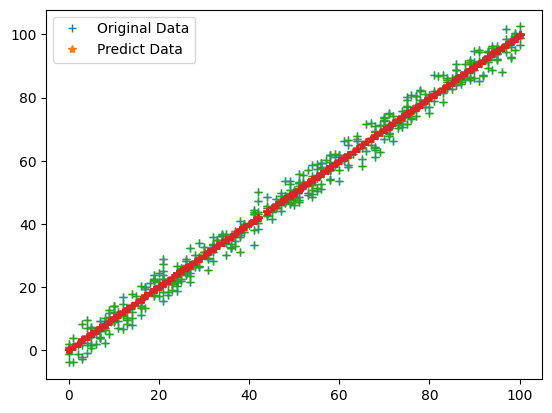

 15%|█▌        | 30/200 [00:10<01:44,  1.63it/s]

Loss at the 31 iteration is 3.927753715382006


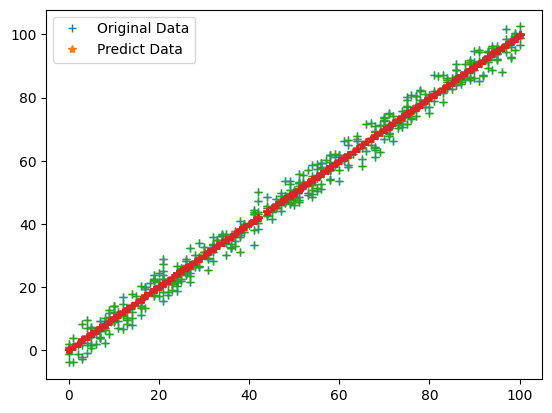

 16%|█▌        | 31/200 [00:11<01:41,  1.66it/s]

Loss at the 32 iteration is 3.9277528259404444


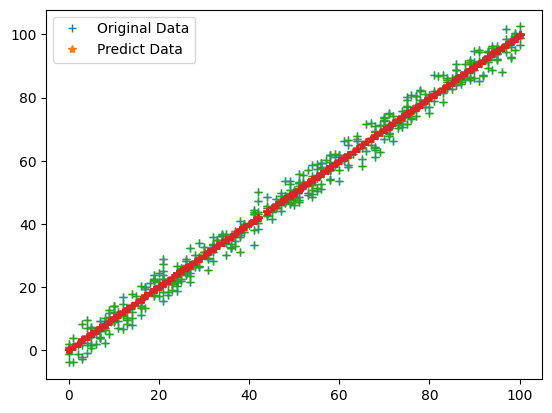

 16%|█▌        | 32/200 [00:11<01:41,  1.65it/s]

Loss at the 33 iteration is 3.9277519437973623


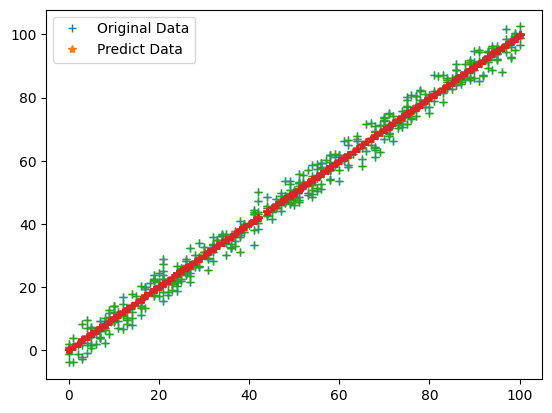

 16%|█▋        | 33/200 [00:12<02:11,  1.27it/s]

Loss at the 34 iteration is 3.9277510649897183


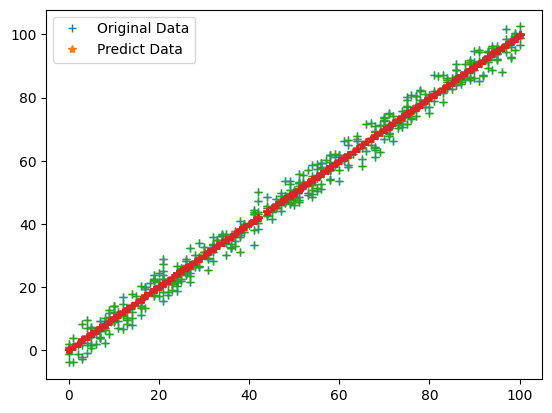

 17%|█▋        | 34/200 [00:13<02:22,  1.16it/s]

Loss at the 35 iteration is 3.927750187719474


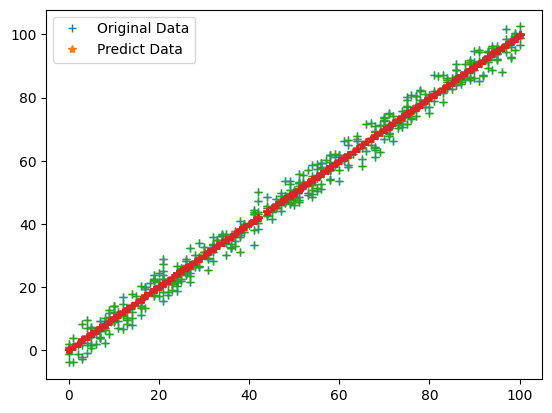

 18%|█▊        | 35/200 [00:14<02:28,  1.11it/s]

Loss at the 36 iteration is 3.927749311170854


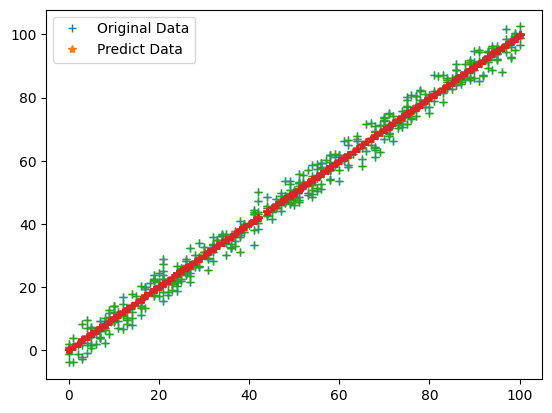

 18%|█▊        | 36/200 [00:15<02:33,  1.07it/s]

Loss at the 37 iteration is 3.9277484349737444


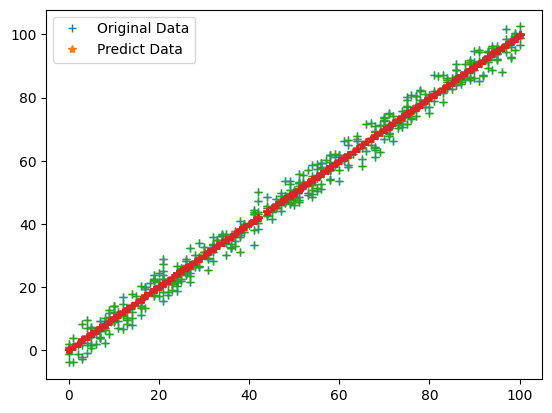

 18%|█▊        | 37/200 [00:17<02:39,  1.02it/s]

Loss at the 38 iteration is 3.9277475589602155


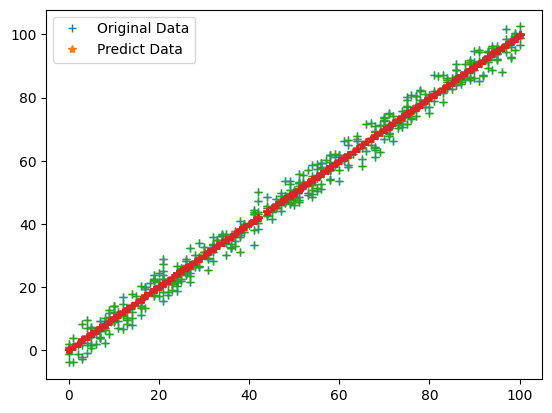

 19%|█▉        | 38/200 [00:18<02:43,  1.01s/it]

Loss at the 39 iteration is 3.927746683054082


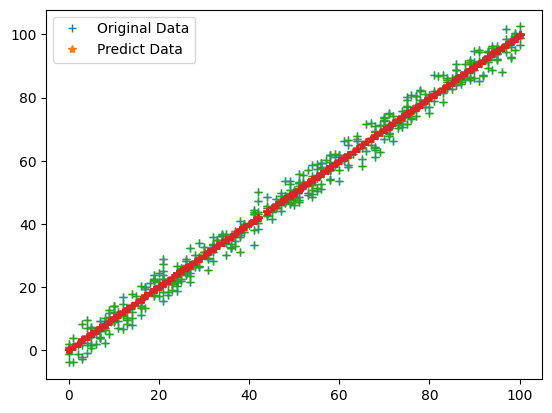

 20%|█▉        | 39/200 [00:18<02:21,  1.13it/s]

Loss at the 40 iteration is 3.9277458072207754


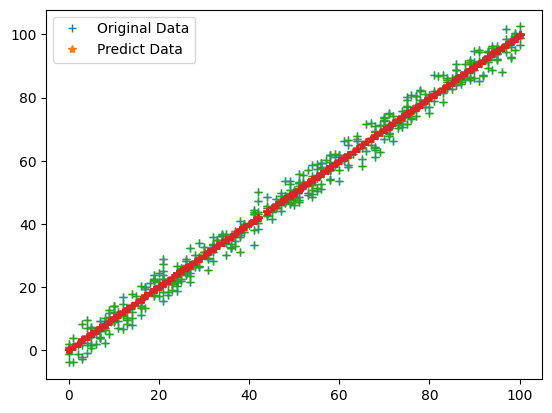

 20%|██        | 40/200 [00:19<02:03,  1.29it/s]

Loss at the 41 iteration is 3.9277449314446113


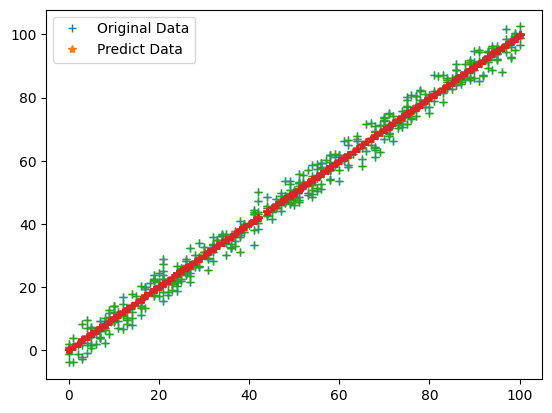

 20%|██        | 41/200 [00:19<01:50,  1.43it/s]

Loss at the 42 iteration is 3.927744055718471


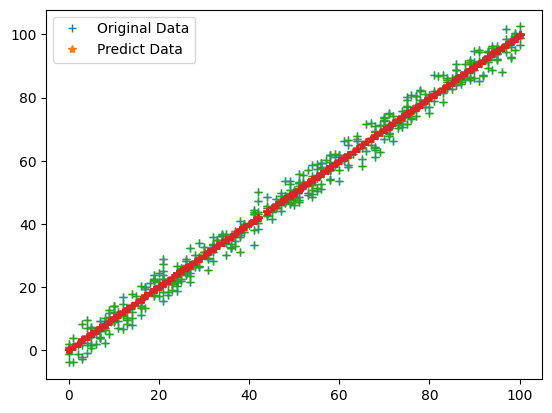

 21%|██        | 42/200 [00:20<02:13,  1.19it/s]

Loss at the 43 iteration is 3.9277431800391236


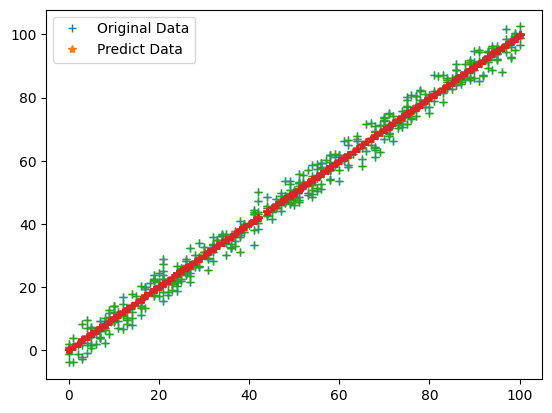

 22%|██▏       | 43/200 [00:21<02:20,  1.12it/s]

Loss at the 44 iteration is 3.927742304405106


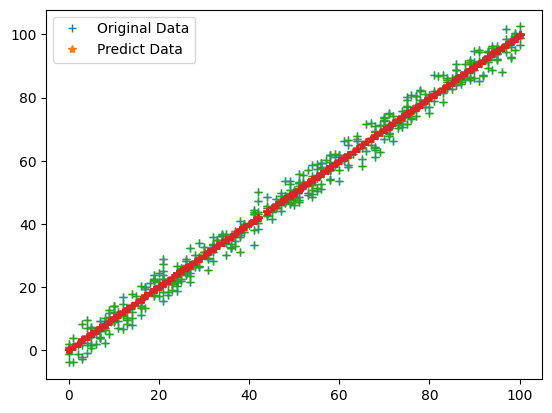

 22%|██▏       | 44/200 [00:22<02:23,  1.09it/s]

Loss at the 45 iteration is 3.927741428815746


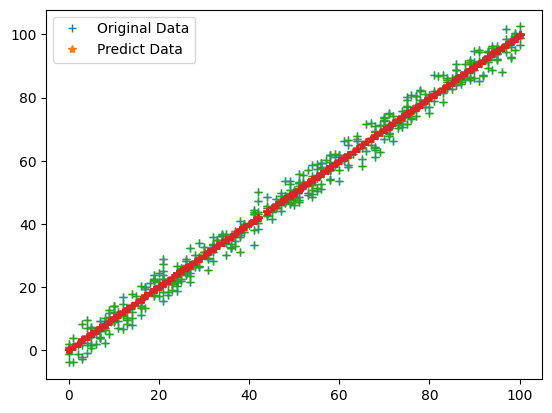

 22%|██▎       | 45/200 [00:23<02:21,  1.10it/s]

Loss at the 46 iteration is 3.9277405532707443


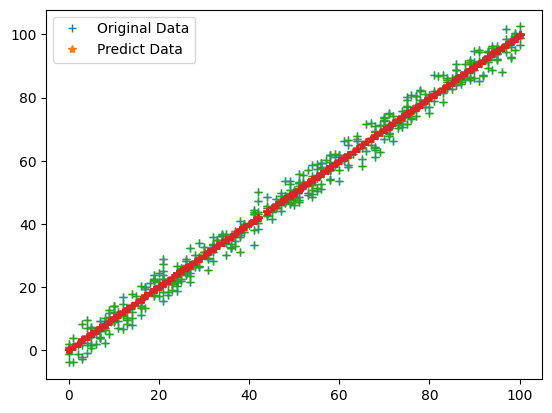

 23%|██▎       | 46/200 [00:24<02:28,  1.04it/s]

Loss at the 47 iteration is 3.9277396777699596


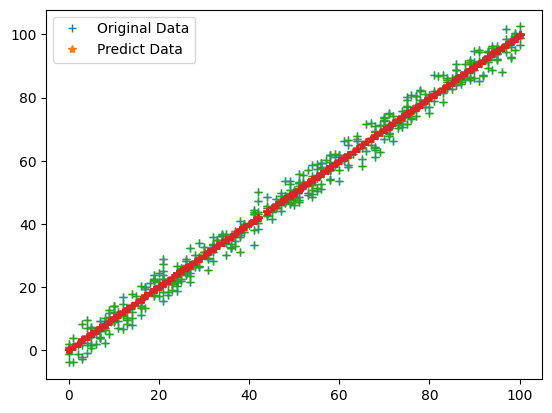

 24%|██▎       | 47/200 [00:26<02:34,  1.01s/it]

Loss at the 48 iteration is 3.927738802313329


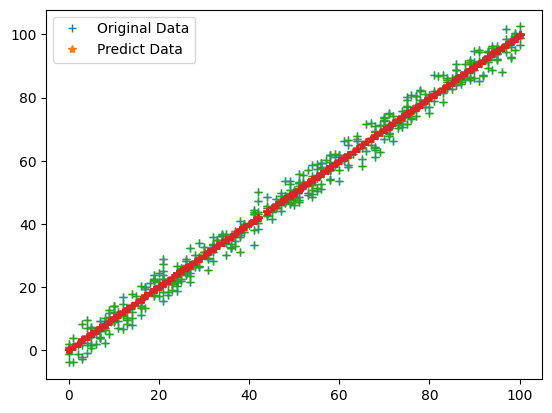

 24%|██▍       | 48/200 [00:26<02:29,  1.01it/s]

Loss at the 49 iteration is 3.92773792690082


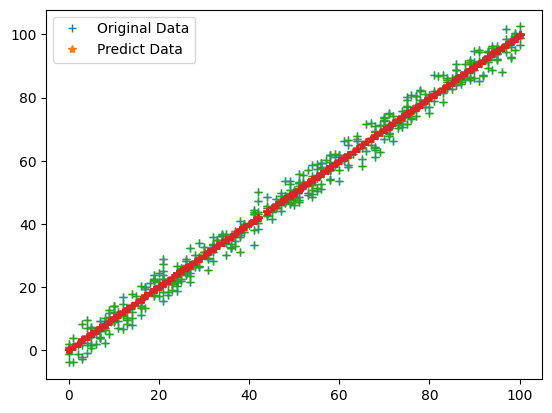

 24%|██▍       | 49/200 [00:28<02:33,  1.02s/it]

Loss at the 50 iteration is 3.9277370515324206


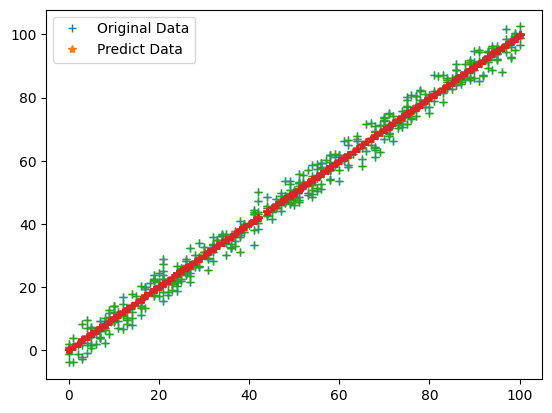

 25%|██▌       | 50/200 [00:29<02:34,  1.03s/it]

Loss at the 51 iteration is 3.9277361762081218


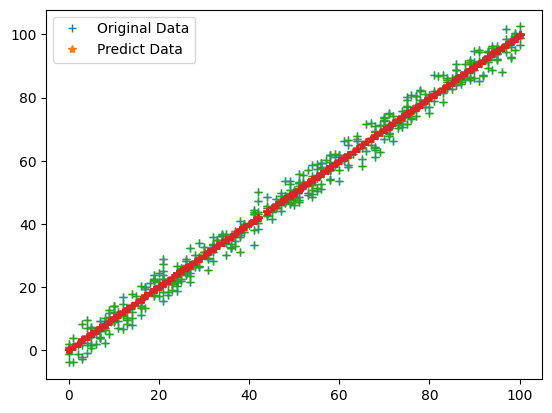

 26%|██▌       | 51/200 [00:30<02:45,  1.11s/it]

Loss at the 52 iteration is 3.927735300927917


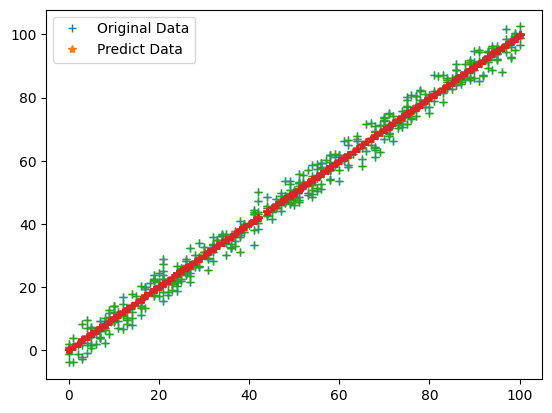

 26%|██▌       | 52/200 [00:32<03:05,  1.26s/it]

Loss at the 53 iteration is 3.927734425691803


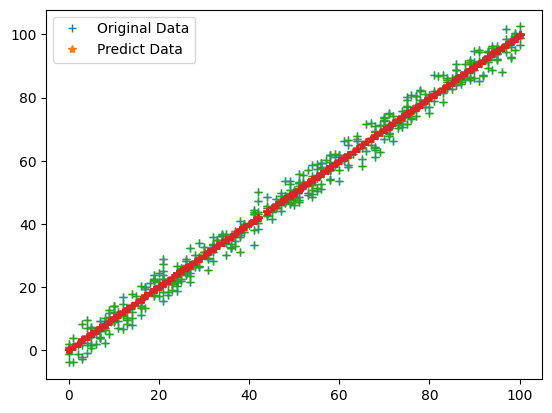

 26%|██▋       | 53/200 [00:32<02:49,  1.15s/it]

Loss at the 54 iteration is 3.92773355049978


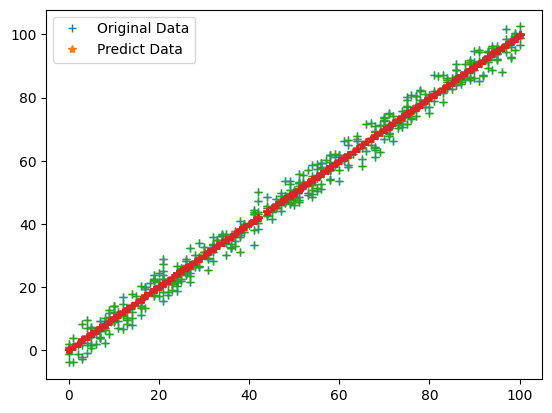

 27%|██▋       | 54/200 [00:33<02:37,  1.08s/it]

Loss at the 55 iteration is 3.9277326753518422


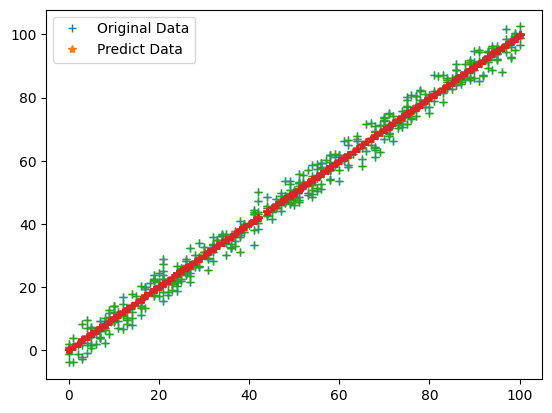

 28%|██▊       | 55/200 [00:34<02:05,  1.15it/s]

Loss at the 56 iteration is 3.927731800247988


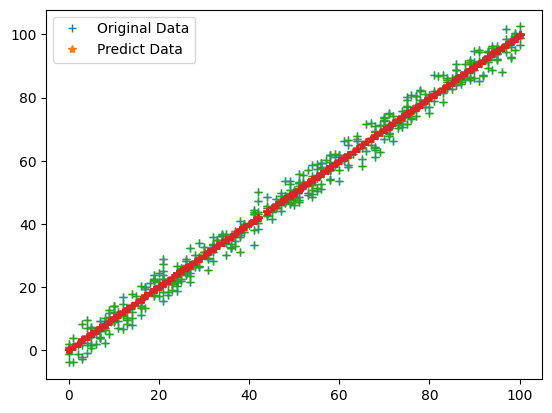

 28%|██▊       | 56/200 [00:34<01:39,  1.45it/s]

Loss at the 57 iteration is 3.927730925188217


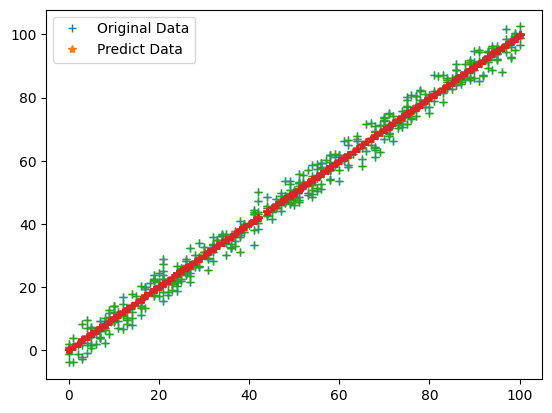

 28%|██▊       | 57/200 [00:34<01:19,  1.79it/s]

Loss at the 58 iteration is 3.9277300501725256


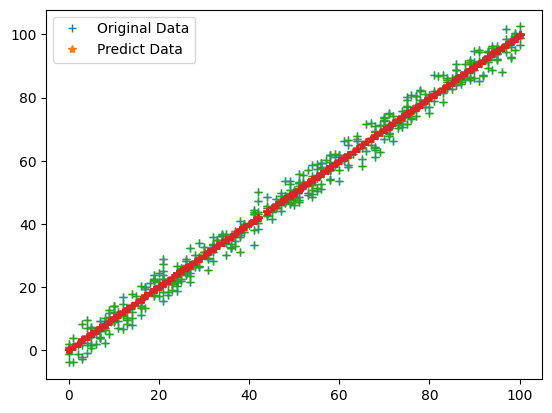

 29%|██▉       | 58/200 [00:35<01:13,  1.95it/s]

Loss at the 59 iteration is 3.9277291752009114


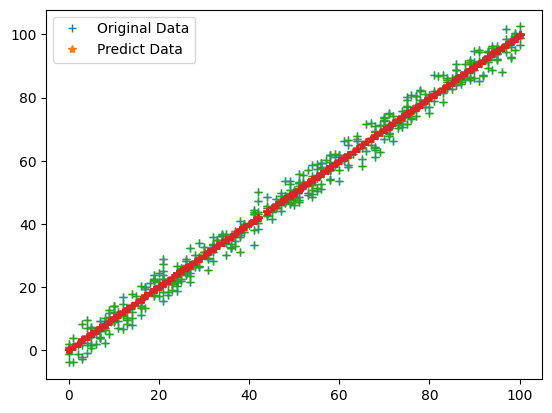

 30%|██▉       | 59/200 [00:35<01:03,  2.23it/s]

Loss at the 60 iteration is 3.927728300273372


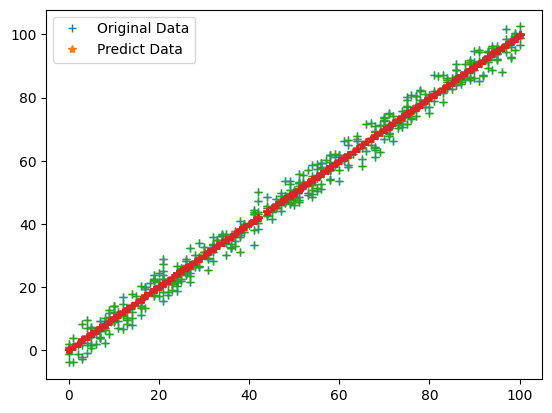

 30%|███       | 60/200 [00:35<00:55,  2.54it/s]

Loss at the 61 iteration is 3.9277274253899064


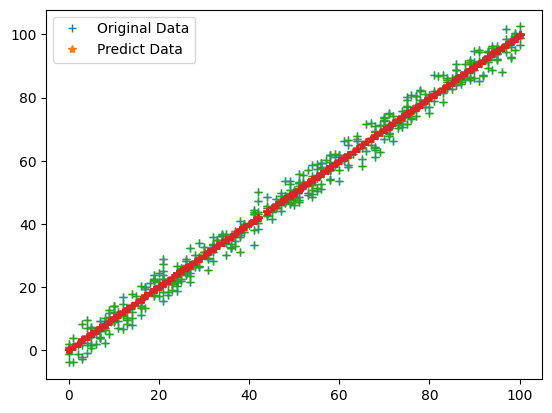

 30%|███       | 61/200 [00:36<01:30,  1.53it/s]

Loss at the 62 iteration is 3.9277265505505112


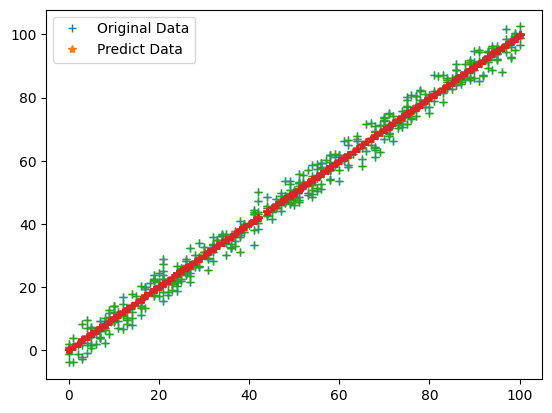

 31%|███       | 62/200 [00:37<01:37,  1.41it/s]

Loss at the 63 iteration is 3.927725675755185


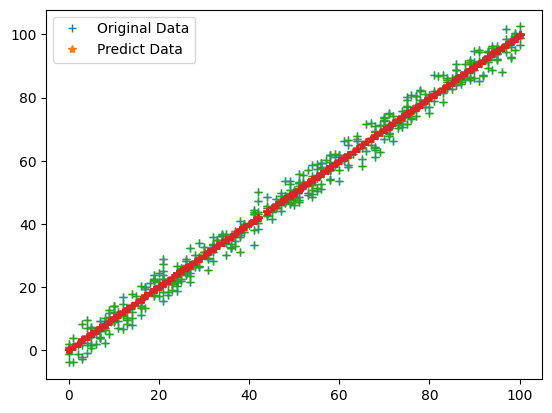

 32%|███▏      | 63/200 [00:38<01:21,  1.67it/s]

Loss at the 64 iteration is 3.927724801003924


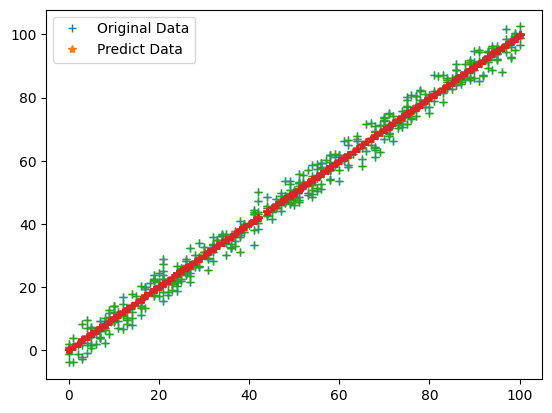

 32%|███▏      | 64/200 [00:38<01:08,  1.99it/s]

Loss at the 65 iteration is 3.9277239262967285


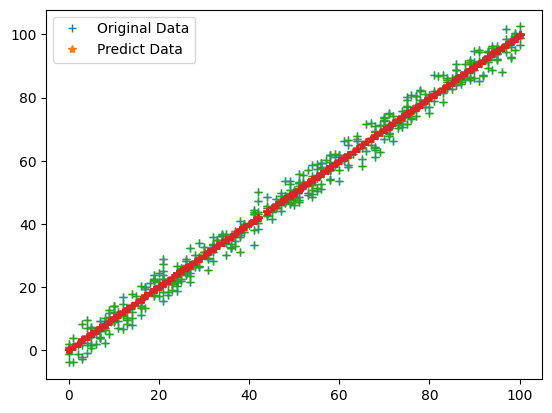

 32%|███▎      | 65/200 [00:38<00:58,  2.32it/s]

Loss at the 66 iteration is 3.927723051633594


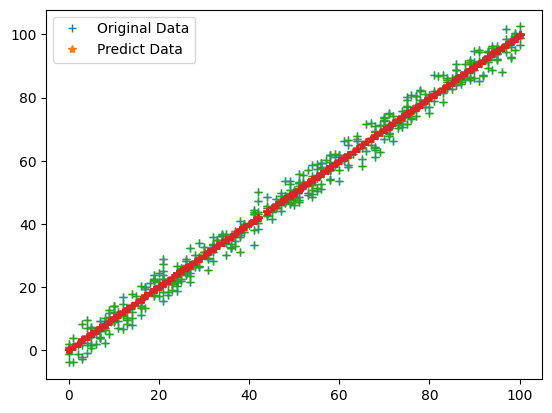

 33%|███▎      | 66/200 [00:38<00:51,  2.62it/s]

Loss at the 67 iteration is 3.9277221770145188


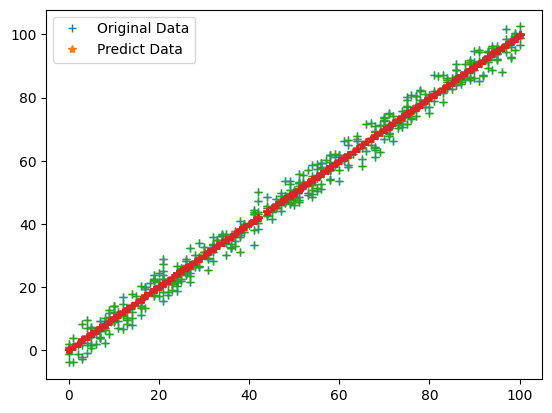

 34%|███▎      | 67/200 [00:39<01:12,  1.84it/s]

Loss at the 68 iteration is 3.9277213024395023


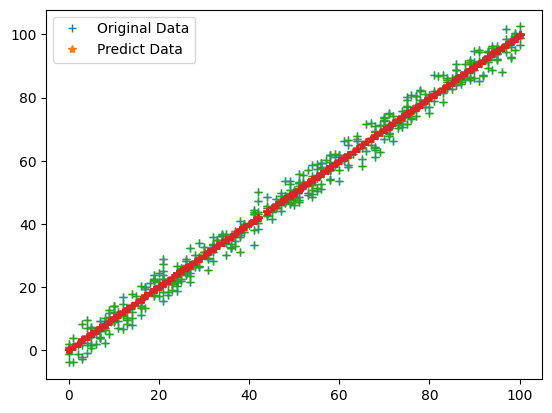

 34%|███▍      | 68/200 [00:40<01:27,  1.51it/s]

Loss at the 69 iteration is 3.9277204279085405


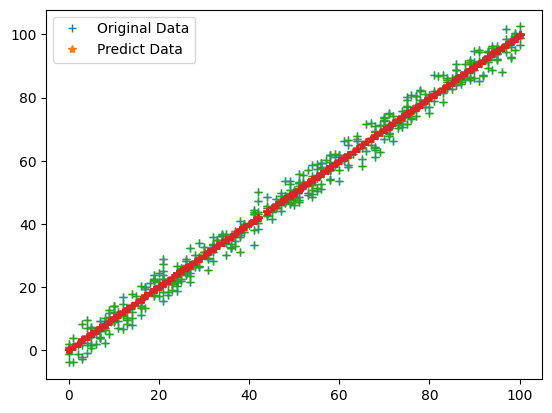

 34%|███▍      | 69/200 [00:41<01:14,  1.76it/s]

Loss at the 70 iteration is 3.927719553421632


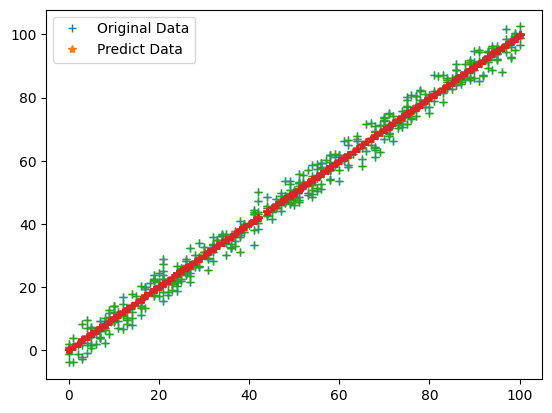

 35%|███▌      | 70/200 [00:41<01:02,  2.07it/s]

Loss at the 71 iteration is 3.9277186789787732


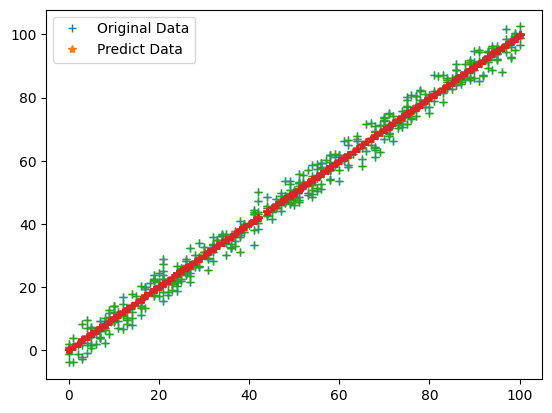

 36%|███▌      | 71/200 [00:41<00:55,  2.34it/s]

Loss at the 72 iteration is 3.927717804579964


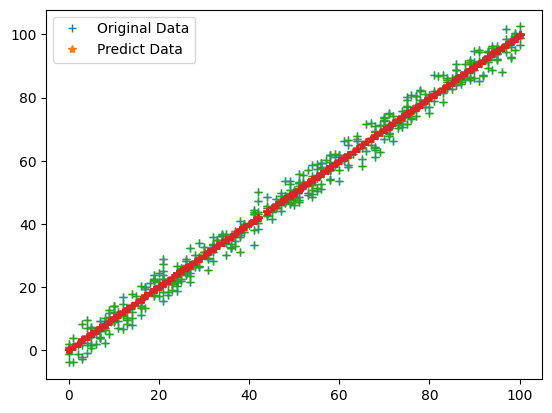

 36%|███▌      | 72/200 [00:42<00:51,  2.48it/s]

Loss at the 73 iteration is 3.9277169302252015


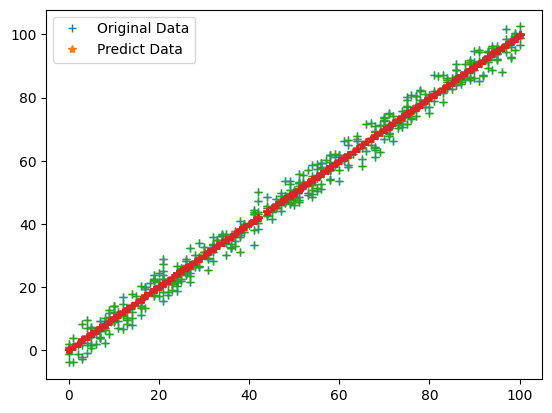

 36%|███▋      | 73/200 [00:42<01:07,  1.87it/s]

Loss at the 74 iteration is 3.9277160559144813


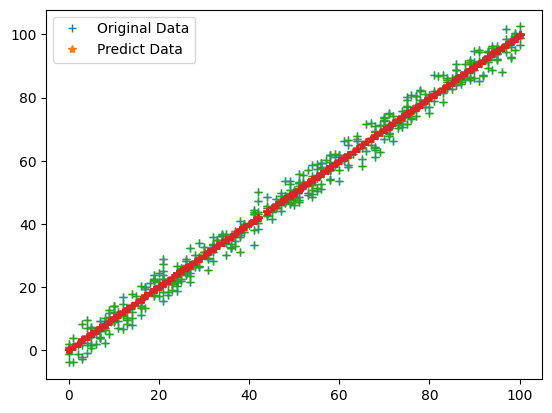

 37%|███▋      | 74/200 [00:43<01:23,  1.51it/s]

Loss at the 75 iteration is 3.9277151816478053


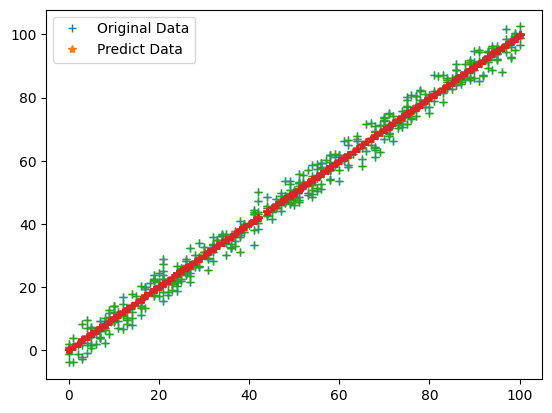

 38%|███▊      | 75/200 [00:44<01:34,  1.33it/s]

Loss at the 76 iteration is 3.927714307425168


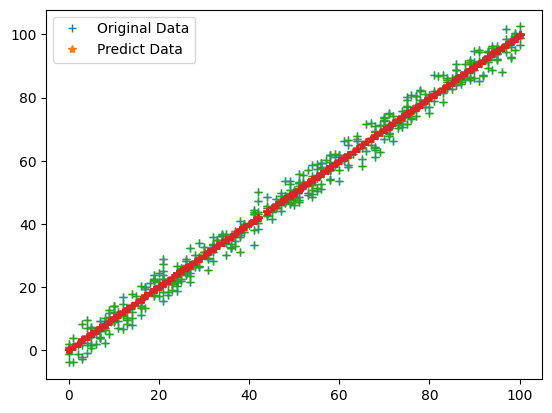

 38%|███▊      | 76/200 [00:45<01:41,  1.22it/s]

Loss at the 77 iteration is 3.9277134332465677


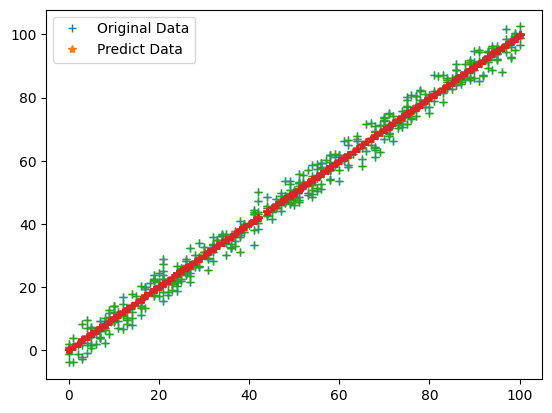

 38%|███▊      | 77/200 [00:46<01:25,  1.45it/s]

Loss at the 78 iteration is 3.9277125591120035


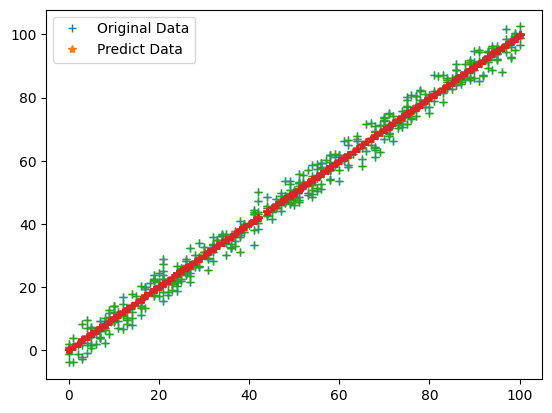

 39%|███▉      | 78/200 [00:46<01:09,  1.75it/s]

Loss at the 79 iteration is 3.927711685021472


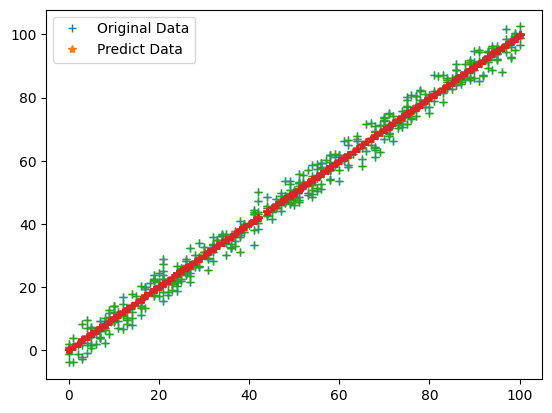

 40%|███▉      | 79/200 [00:46<00:58,  2.07it/s]

Loss at the 80 iteration is 3.927710810974971


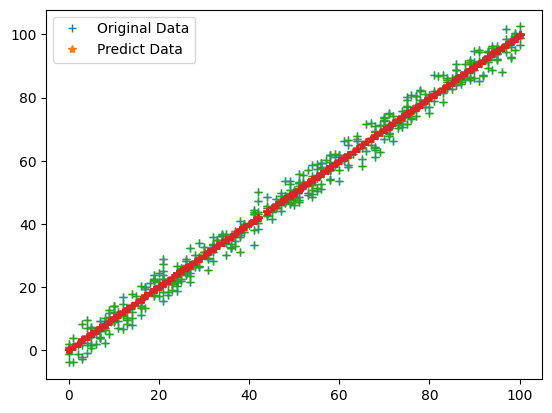

 40%|████      | 80/200 [00:47<00:53,  2.25it/s]

Loss at the 81 iteration is 3.9277099369724993


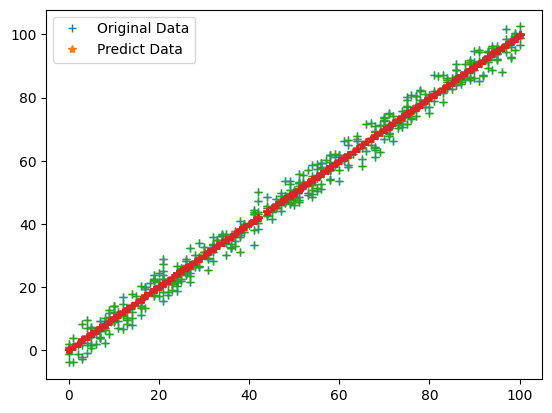

 40%|████      | 81/200 [00:47<00:47,  2.50it/s]

Loss at the 82 iteration is 3.9277090630140528


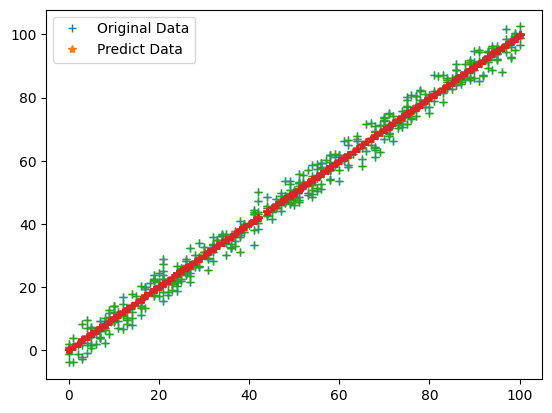

 41%|████      | 82/200 [00:47<00:44,  2.66it/s]

Loss at the 83 iteration is 3.9277081890996315


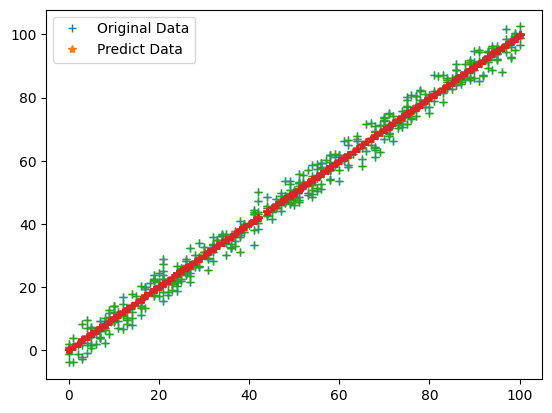

 42%|████▏     | 83/200 [00:48<00:42,  2.76it/s]

Loss at the 84 iteration is 3.9277073152292323


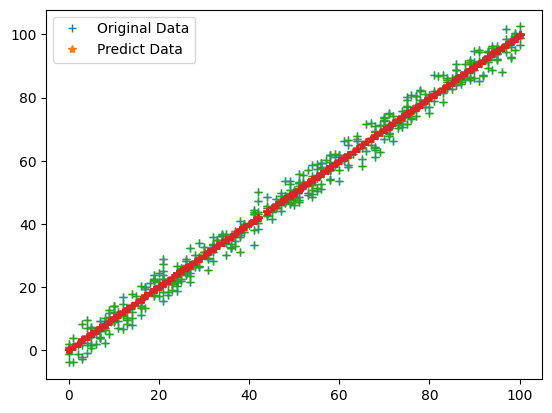

 42%|████▏     | 84/200 [00:48<00:59,  1.94it/s]

Loss at the 85 iteration is 3.927706441402853


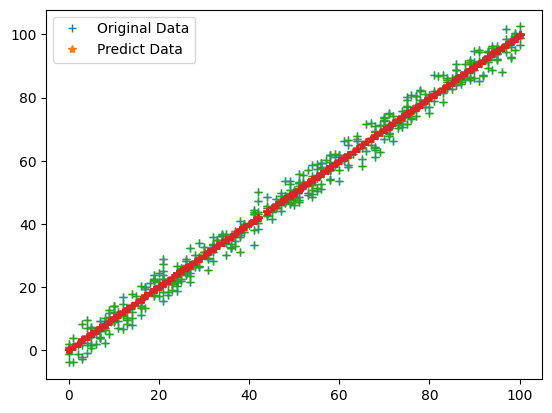

 42%|████▎     | 85/200 [00:49<01:13,  1.57it/s]

Loss at the 86 iteration is 3.927705567620491


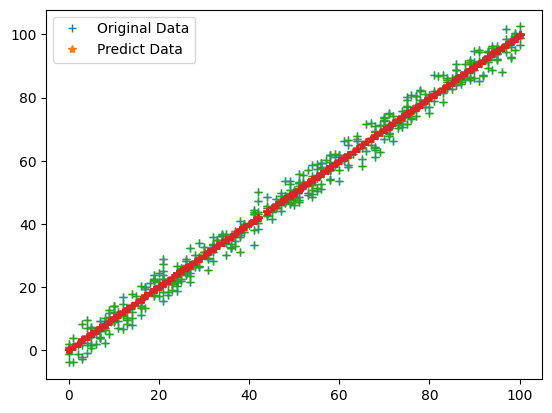

 43%|████▎     | 86/200 [00:50<01:00,  1.88it/s]

Loss at the 87 iteration is 3.927704693882144


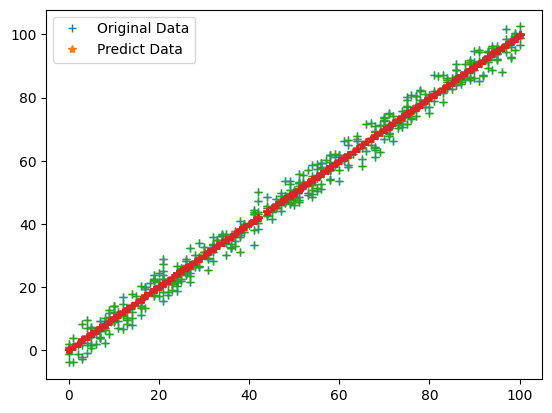

 44%|████▎     | 87/200 [00:50<00:51,  2.19it/s]

Loss at the 88 iteration is 3.9277038201878103


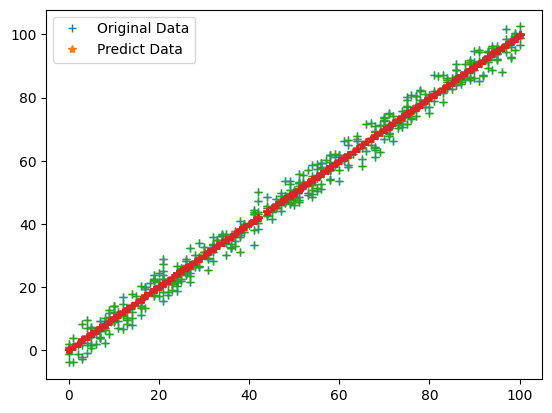

 44%|████▍     | 88/200 [00:50<00:45,  2.46it/s]

Loss at the 89 iteration is 3.927702946537487


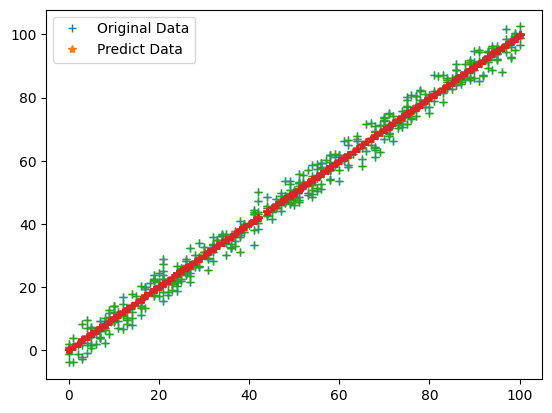

 44%|████▍     | 89/200 [00:51<00:43,  2.58it/s]

Loss at the 90 iteration is 3.9277020729311727


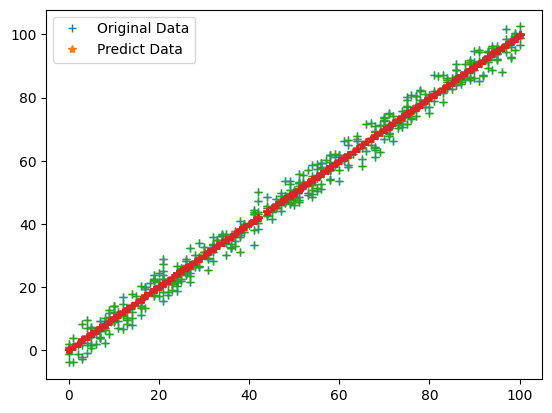

 45%|████▌     | 90/200 [00:51<00:40,  2.73it/s]

Loss at the 91 iteration is 3.927701199368865


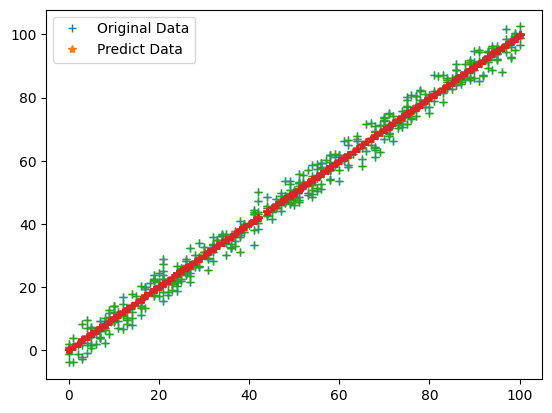

 46%|████▌     | 91/200 [00:51<00:38,  2.82it/s]

Loss at the 92 iteration is 3.9277003258505614


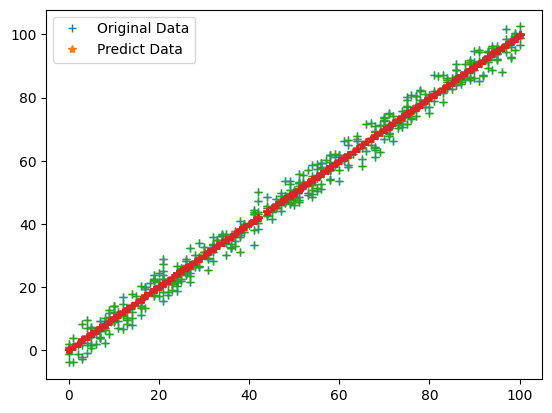

 46%|████▌     | 92/200 [00:52<01:02,  1.73it/s]

Loss at the 93 iteration is 3.9276994523762596


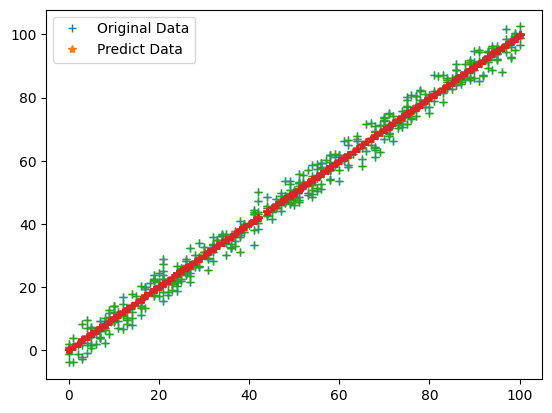

 46%|████▋     | 93/200 [00:53<00:55,  1.91it/s]

Loss at the 94 iteration is 3.927698578945958


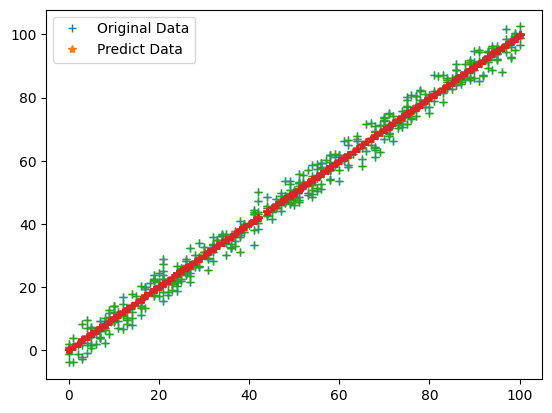

 47%|████▋     | 94/200 [00:53<00:49,  2.15it/s]

Loss at the 95 iteration is 3.9276977055596545


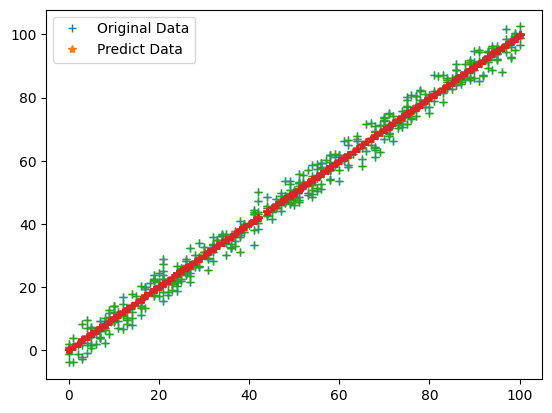

 48%|████▊     | 95/200 [00:53<00:43,  2.41it/s]

Loss at the 96 iteration is 3.927696832217346


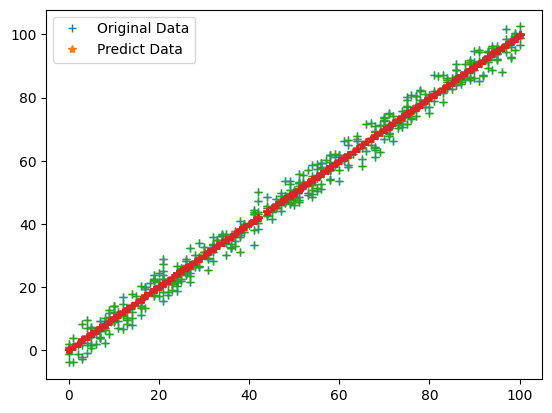

 48%|████▊     | 96/200 [00:54<00:41,  2.53it/s]

Loss at the 97 iteration is 3.92769595891903


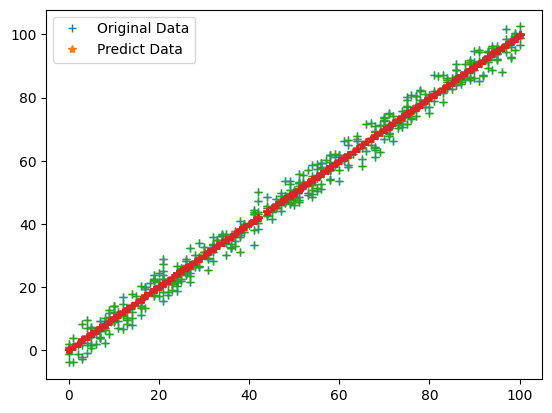

 48%|████▊     | 97/200 [00:54<00:38,  2.65it/s]

Loss at the 98 iteration is 3.9276950856647055


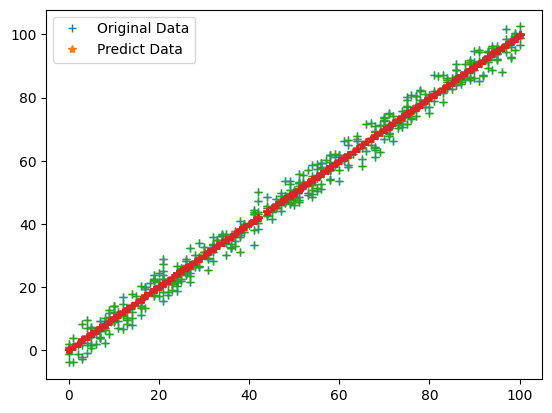

 49%|████▉     | 98/200 [00:55<00:47,  2.15it/s]

Loss at the 99 iteration is 3.927694212454369


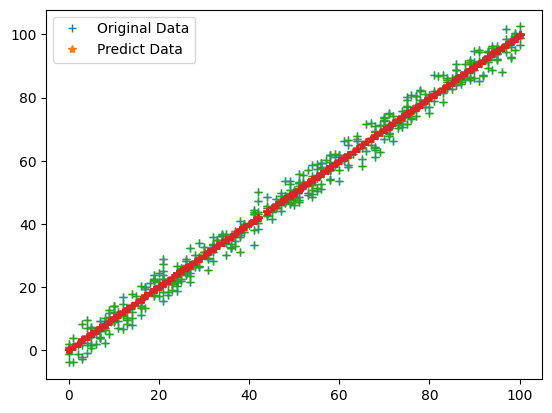

 50%|████▉     | 99/200 [00:55<00:42,  2.35it/s]

Loss at the 100 iteration is 3.92769333928802


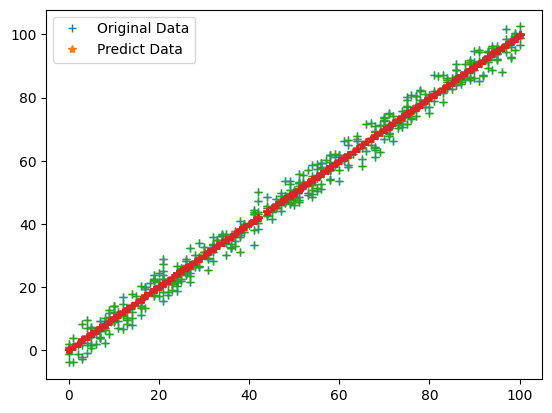

 50%|█████     | 100/200 [00:55<00:40,  2.48it/s]

Loss at the 101 iteration is 3.927692466165654


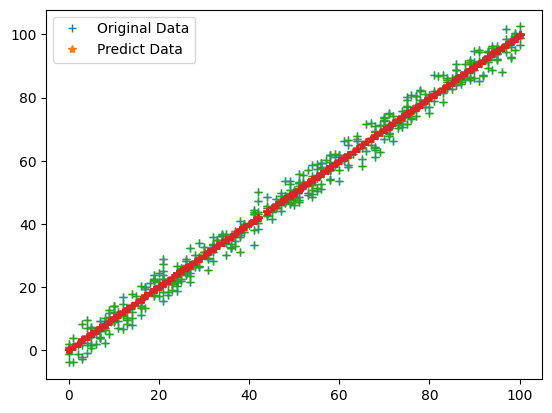

 50%|█████     | 101/200 [00:56<00:58,  1.69it/s]

Loss at the 102 iteration is 3.9276915930872716


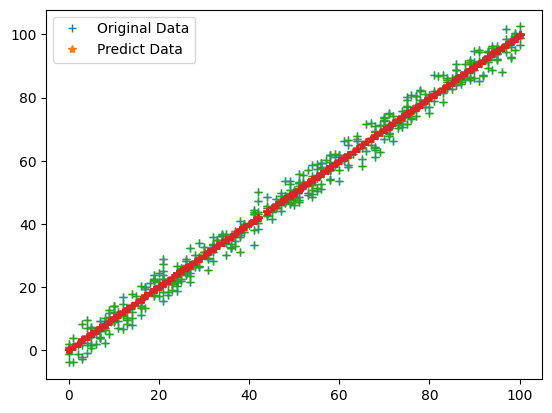

 51%|█████     | 102/200 [00:57<01:07,  1.44it/s]

Loss at the 103 iteration is 3.927690720052868


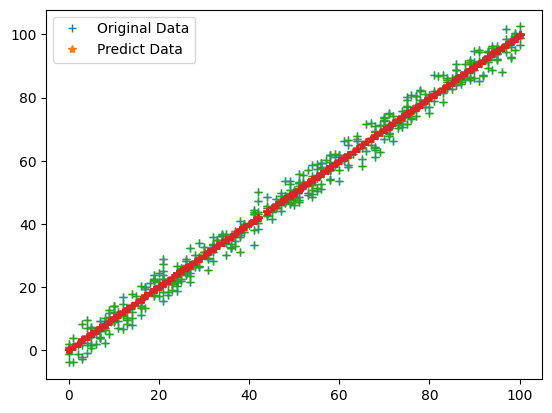

 52%|█████▏    | 103/200 [00:58<01:14,  1.30it/s]

Loss at the 104 iteration is 3.927689847062442


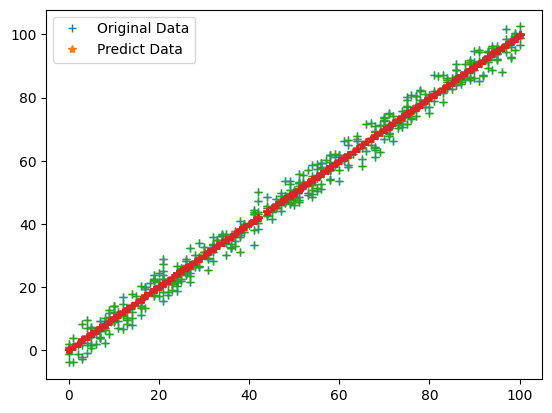

 52%|█████▏    | 104/200 [00:59<01:01,  1.56it/s]

Loss at the 105 iteration is 3.927688974115992


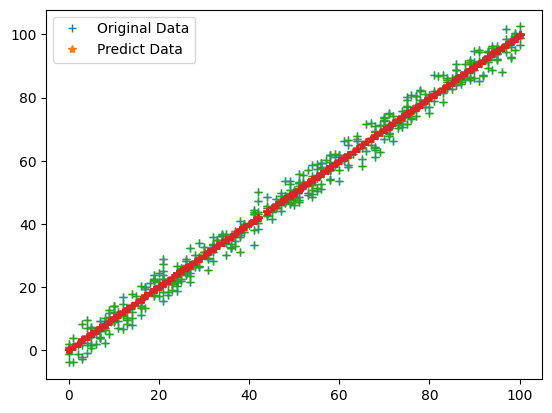

 52%|█████▎    | 105/200 [00:59<00:52,  1.82it/s]

Loss at the 106 iteration is 3.9276881012135156


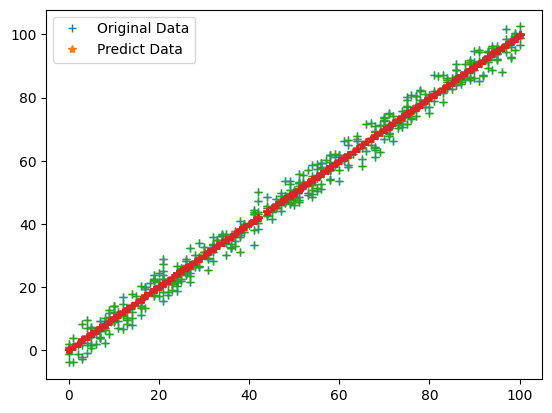

 53%|█████▎    | 106/200 [00:59<00:44,  2.13it/s]

Loss at the 107 iteration is 3.9276872283550093


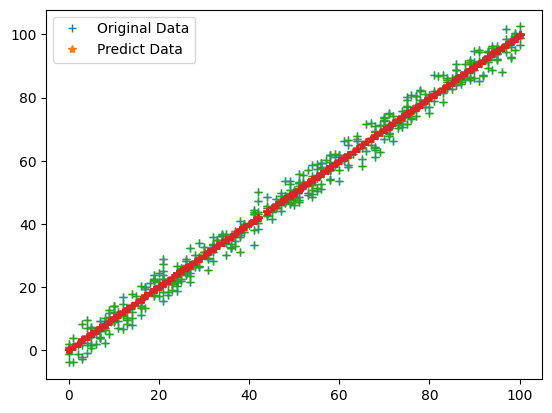

 54%|█████▎    | 107/200 [01:00<01:01,  1.50it/s]

Loss at the 108 iteration is 3.927686355540472


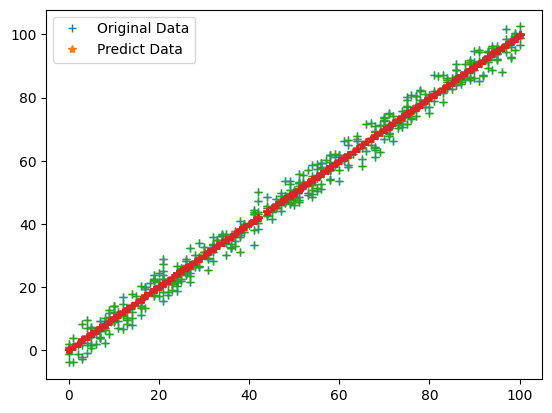

 54%|█████▍    | 108/200 [01:01<01:08,  1.34it/s]

Loss at the 109 iteration is 3.927685482769901


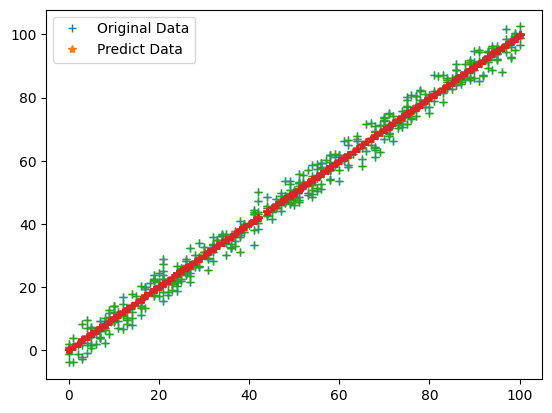

 55%|█████▍    | 109/200 [01:02<00:56,  1.60it/s]

Loss at the 110 iteration is 3.927684610043294


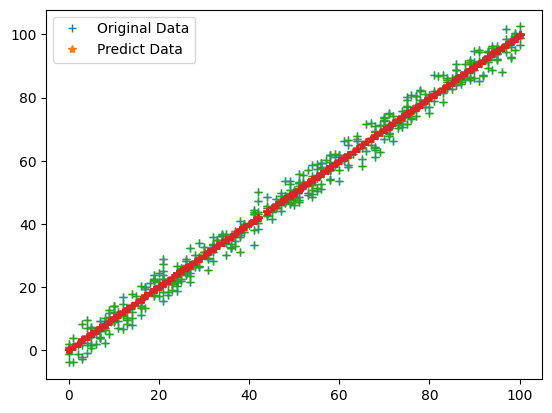

 55%|█████▌    | 110/200 [01:02<00:47,  1.88it/s]

Loss at the 111 iteration is 3.9276837373606512


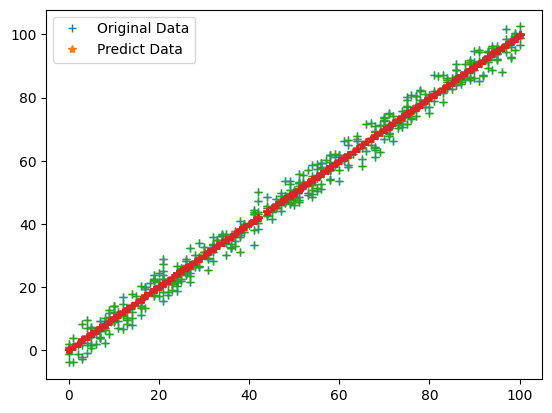

 56%|█████▌    | 111/200 [01:02<00:42,  2.11it/s]

Loss at the 112 iteration is 3.9276828647219664


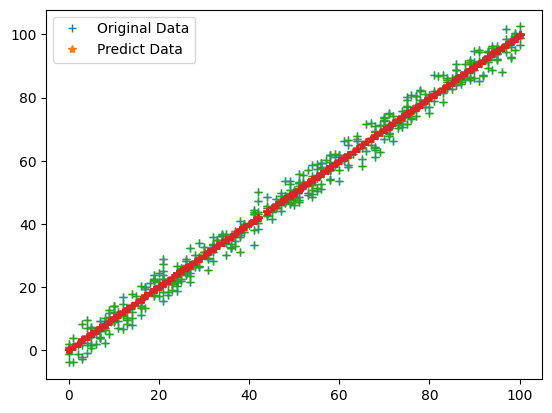

 56%|█████▌    | 112/200 [01:03<00:57,  1.53it/s]

Loss at the 113 iteration is 3.92768199212724


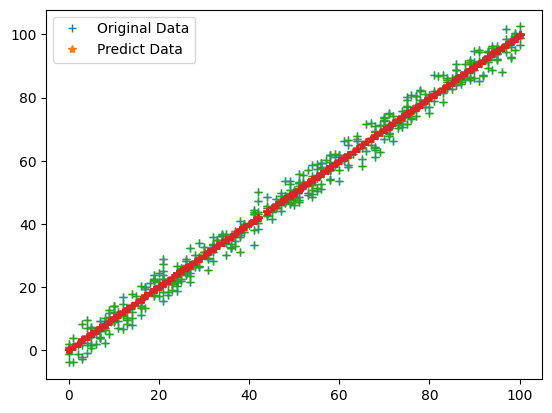

 56%|█████▋    | 113/200 [01:04<01:03,  1.36it/s]

Loss at the 114 iteration is 3.9276811195764685


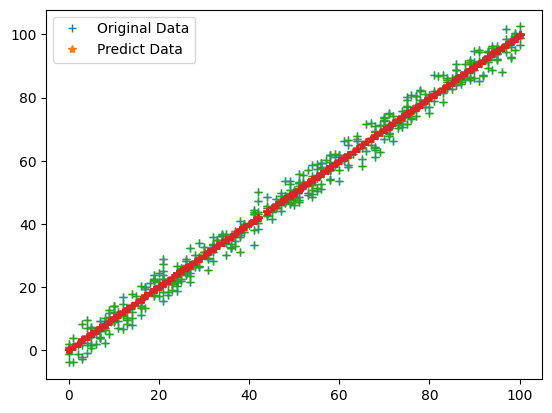

 57%|█████▋    | 114/200 [01:05<00:53,  1.60it/s]

Loss at the 115 iteration is 3.92768024706965


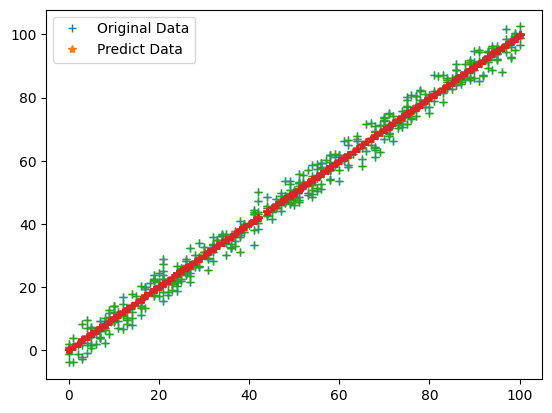

 57%|█████▊    | 115/200 [01:05<00:45,  1.88it/s]

Loss at the 116 iteration is 3.927679374606785


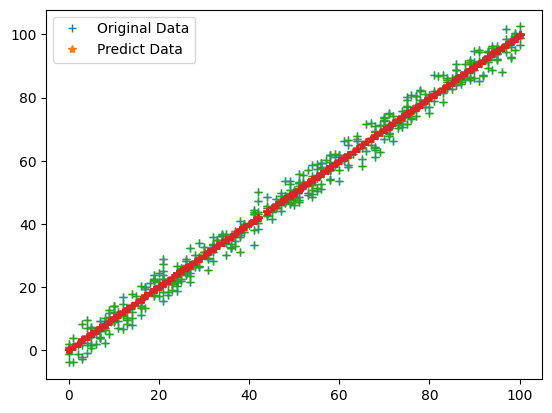

 58%|█████▊    | 116/200 [01:05<00:39,  2.14it/s]

Loss at the 117 iteration is 3.9276785021878657


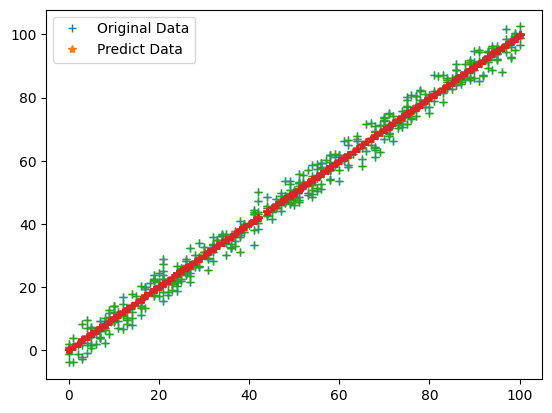

 58%|█████▊    | 117/200 [01:06<00:52,  1.57it/s]

Loss at the 118 iteration is 3.927677629812895


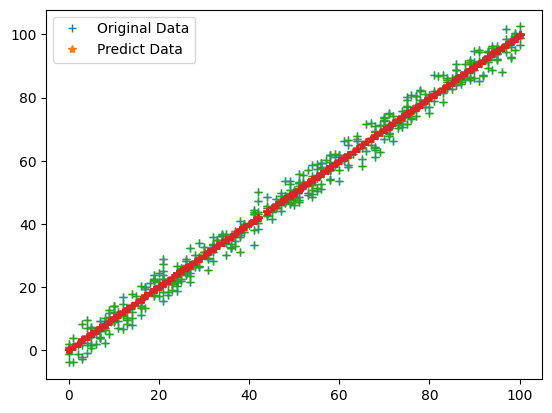

 59%|█████▉    | 118/200 [01:07<00:46,  1.78it/s]

Loss at the 119 iteration is 3.927676757481868


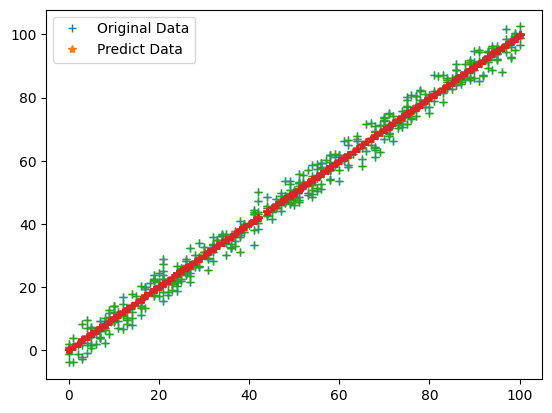

 60%|█████▉    | 119/200 [01:07<00:39,  2.04it/s]

Loss at the 120 iteration is 3.9276758851947835


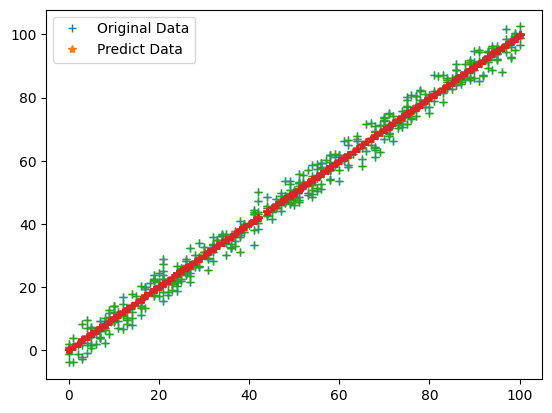

 60%|██████    | 120/200 [01:08<00:41,  1.91it/s]

Loss at the 121 iteration is 3.9276750129516387


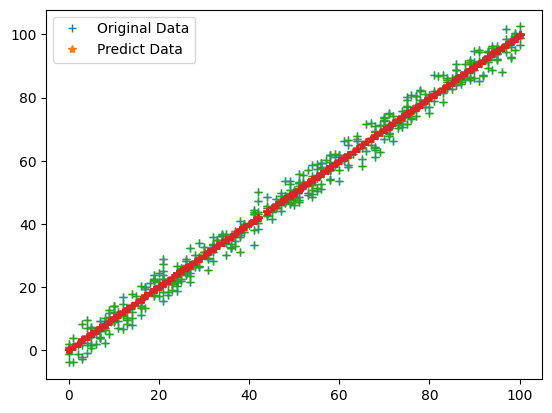

 60%|██████    | 121/200 [01:08<00:38,  2.05it/s]

Loss at the 122 iteration is 3.9276741407524325


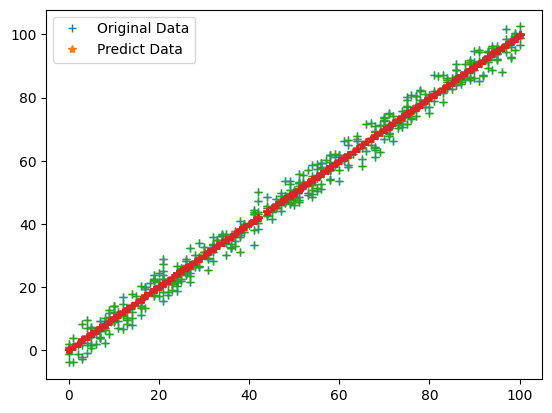

 61%|██████    | 122/200 [01:09<00:42,  1.84it/s]

Loss at the 123 iteration is 3.9276732685971614


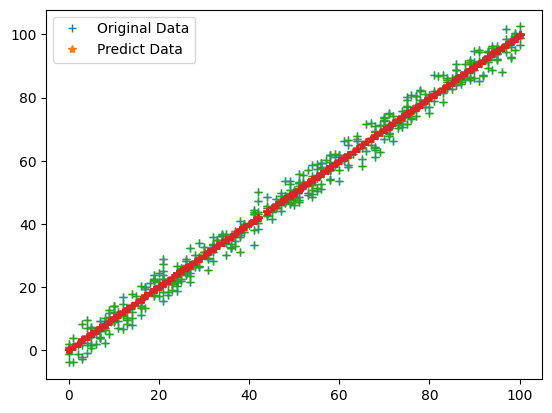

 62%|██████▏   | 123/200 [01:09<00:38,  1.98it/s]

Loss at the 124 iteration is 3.927672396485823


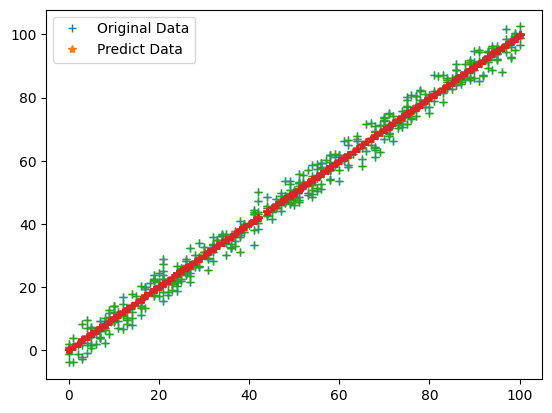

 62%|██████▏   | 124/200 [01:10<00:35,  2.15it/s]

Loss at the 125 iteration is 3.927671524418416


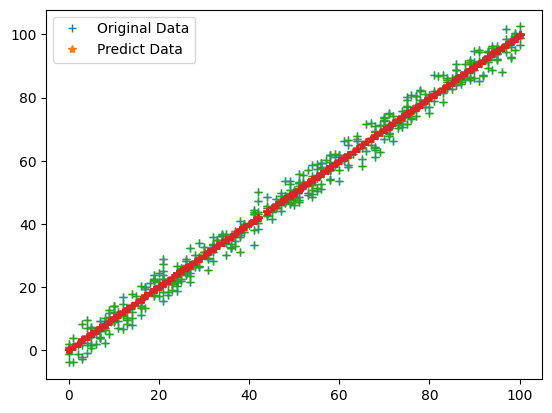

 62%|██████▎   | 125/200 [01:10<00:43,  1.71it/s]

Loss at the 126 iteration is 3.927670652394938


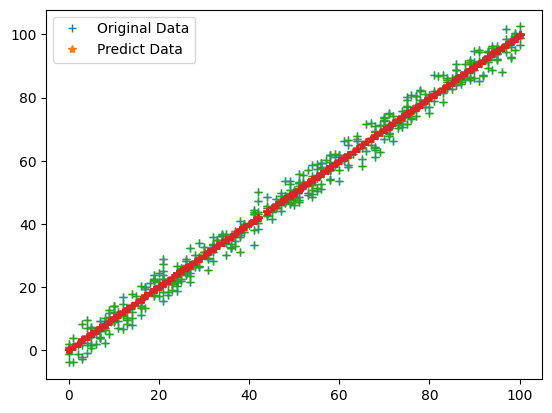

 63%|██████▎   | 126/200 [01:11<00:52,  1.40it/s]

Loss at the 127 iteration is 3.9276697804153864


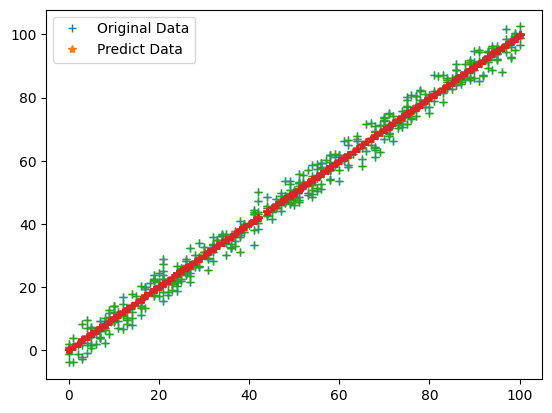

 64%|██████▎   | 127/200 [01:12<00:56,  1.28it/s]

Loss at the 128 iteration is 3.92766890847976


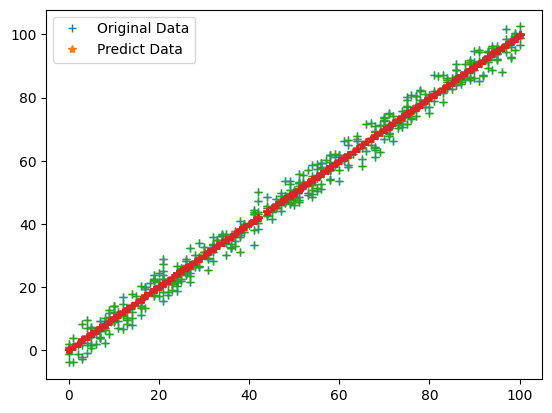

 64%|██████▍   | 128/200 [01:13<00:48,  1.49it/s]

Loss at the 129 iteration is 3.927668036588056


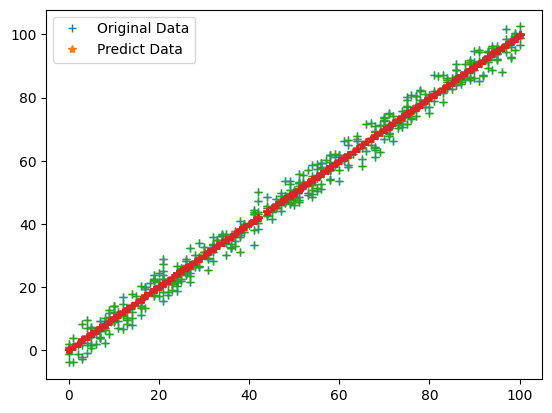

 64%|██████▍   | 129/200 [01:13<00:40,  1.76it/s]

Loss at the 130 iteration is 3.9276671647402708


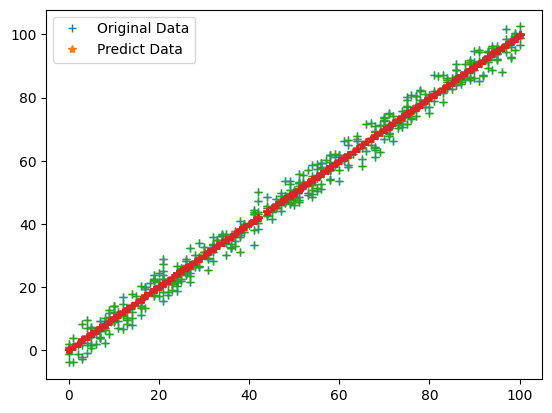

 65%|██████▌   | 130/200 [01:13<00:34,  2.02it/s]

Loss at the 131 iteration is 3.927666292936405


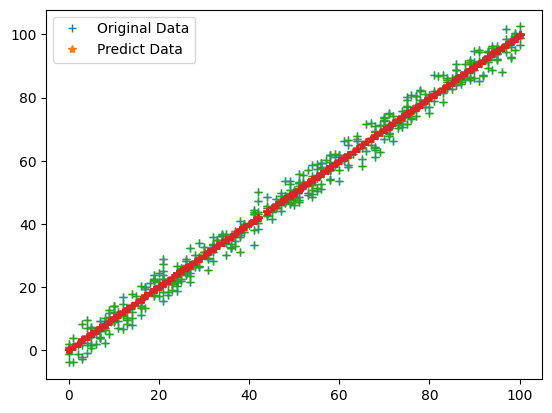

 66%|██████▌   | 131/200 [01:14<00:32,  2.15it/s]

Loss at the 132 iteration is 3.9276654211764543


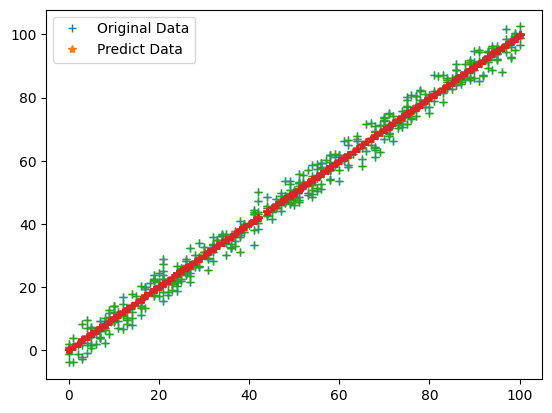

 66%|██████▌   | 132/200 [01:14<00:28,  2.38it/s]

Loss at the 133 iteration is 3.927664549460416


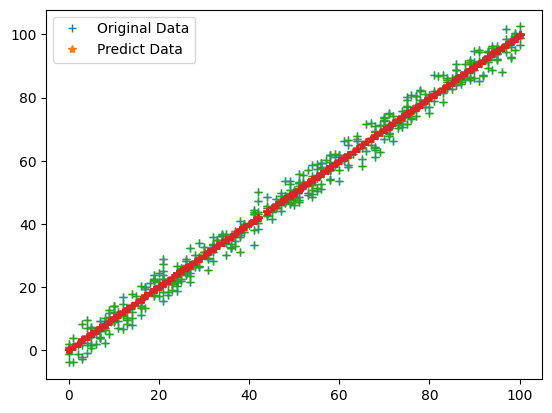

 66%|██████▋   | 133/200 [01:14<00:25,  2.63it/s]

Loss at the 134 iteration is 3.9276636777882903


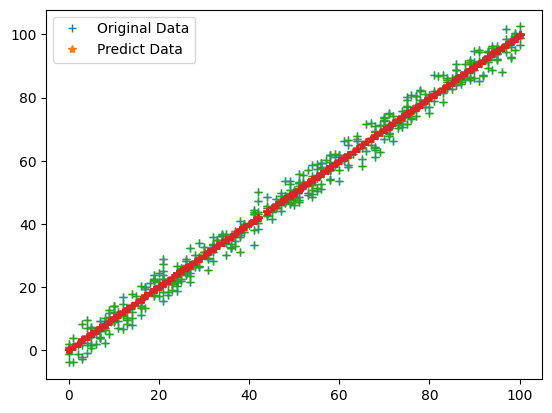

 67%|██████▋   | 134/200 [01:15<00:36,  1.83it/s]

Loss at the 135 iteration is 3.927662806160073


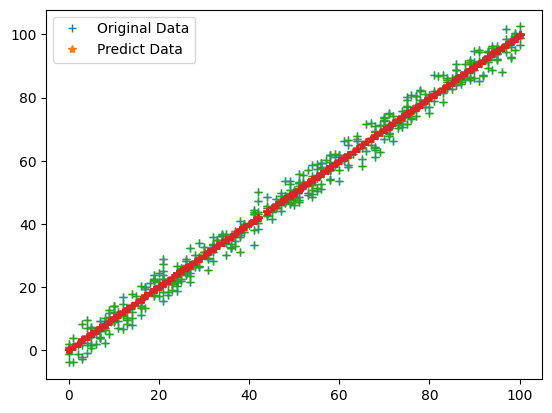

 68%|██████▊   | 135/200 [01:16<00:32,  1.98it/s]

Loss at the 136 iteration is 3.927661934575763


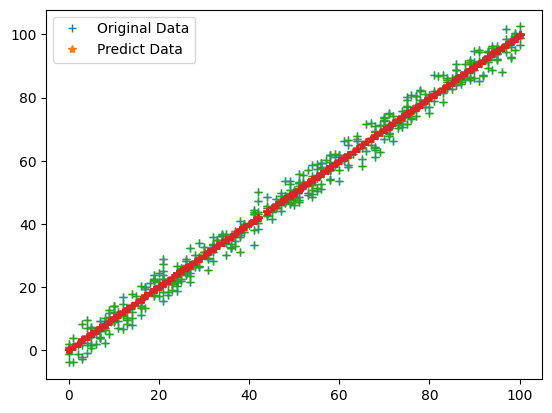

 68%|██████▊   | 136/200 [01:16<00:29,  2.20it/s]

Loss at the 137 iteration is 3.927661063035357


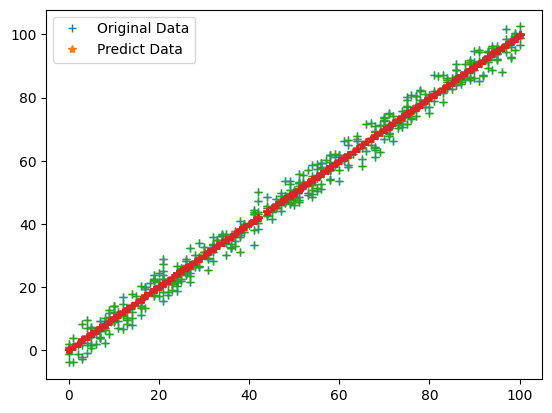

 68%|██████▊   | 137/200 [01:16<00:26,  2.41it/s]

Loss at the 138 iteration is 3.9276601915388545


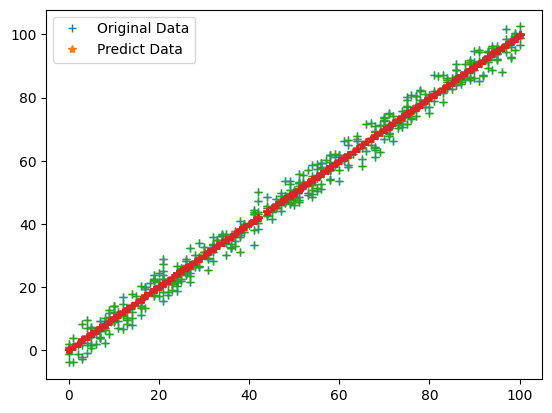

 69%|██████▉   | 138/200 [01:17<00:36,  1.71it/s]

Loss at the 139 iteration is 3.9276593200862506


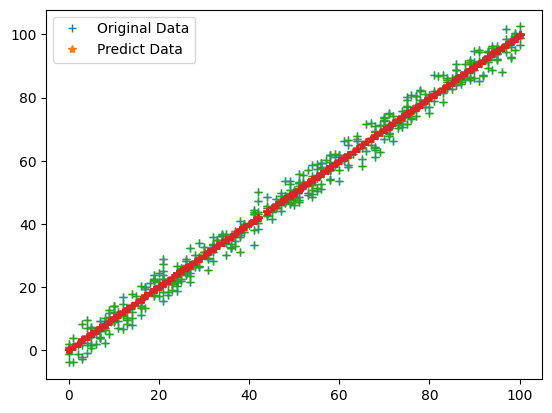

 70%|██████▉   | 139/200 [01:18<00:42,  1.44it/s]

Loss at the 140 iteration is 3.9276584486775454


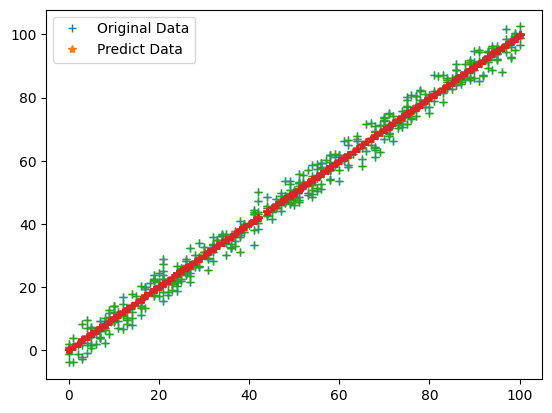

 70%|███████   | 140/200 [01:19<00:36,  1.65it/s]

Loss at the 141 iteration is 3.9276575773127362


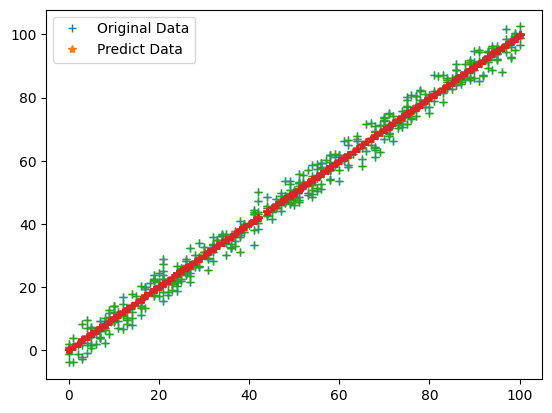

 70%|███████   | 141/200 [01:19<00:30,  1.95it/s]

Loss at the 142 iteration is 3.92765670599182


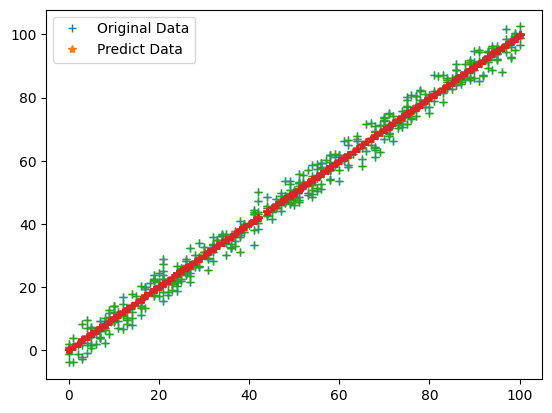

 71%|███████   | 142/200 [01:19<00:26,  2.22it/s]

Loss at the 143 iteration is 3.927655834714796


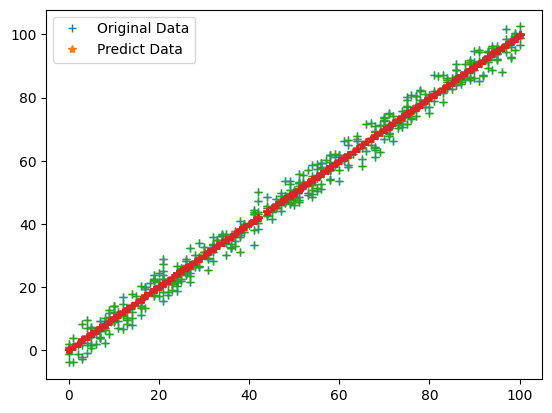

 72%|███████▏  | 143/200 [01:20<00:23,  2.44it/s]

Loss at the 144 iteration is 3.9276549634816598


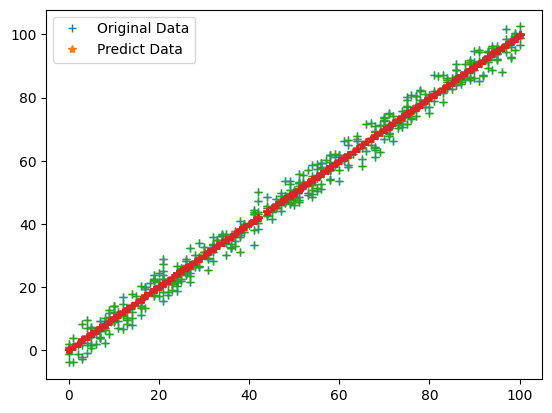

 72%|███████▏  | 144/200 [01:20<00:29,  1.91it/s]

Loss at the 145 iteration is 3.927654092292412


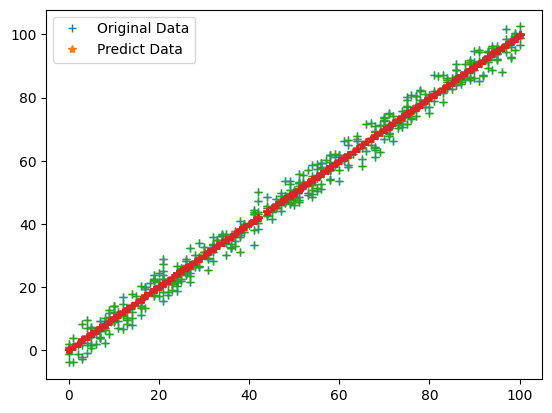

 72%|███████▎  | 145/200 [01:21<00:36,  1.53it/s]

Loss at the 146 iteration is 3.9276532211470476


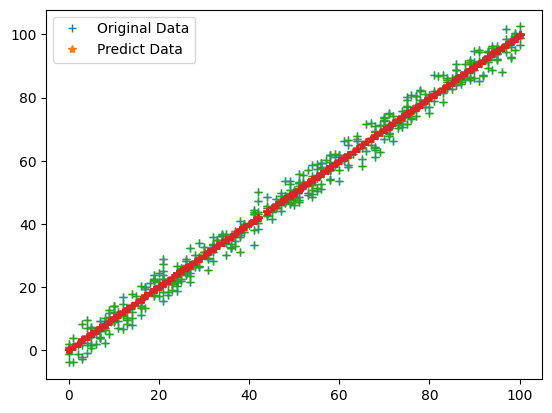

 73%|███████▎  | 146/200 [01:22<00:40,  1.32it/s]

Loss at the 147 iteration is 3.927652350045566


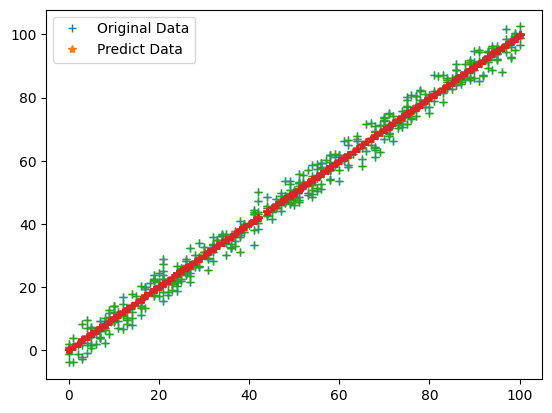

 74%|███████▎  | 147/200 [01:23<00:44,  1.20it/s]

Loss at the 148 iteration is 3.927651478987965


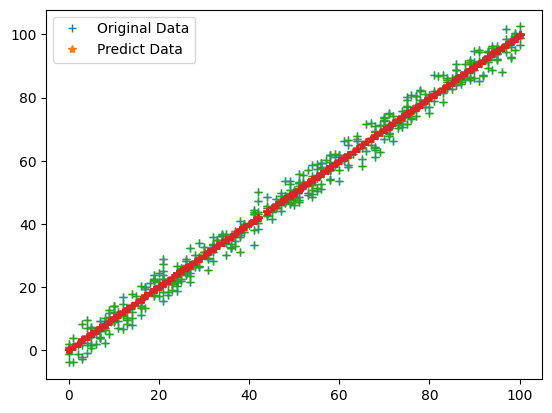

 74%|███████▍  | 148/200 [01:24<00:45,  1.15it/s]

Loss at the 149 iteration is 3.927650607974242


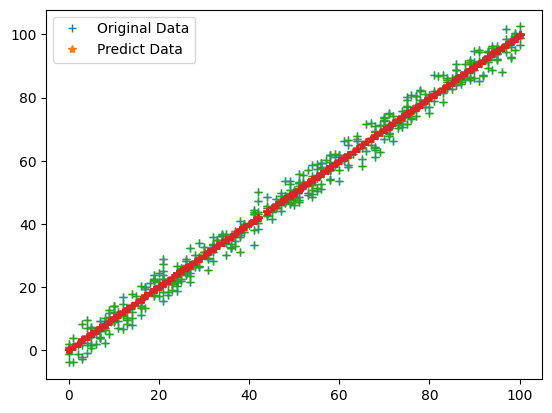

 74%|███████▍  | 149/200 [01:25<00:36,  1.39it/s]

Loss at the 150 iteration is 3.927649737004395


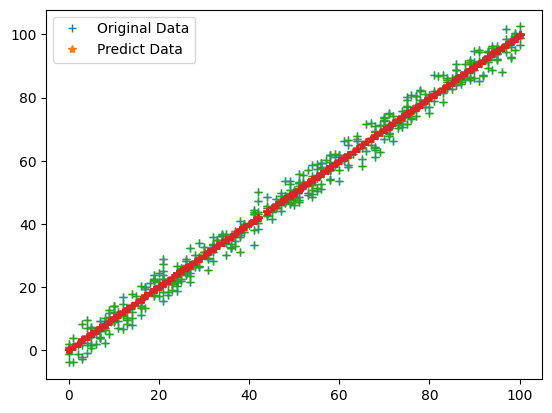

 75%|███████▌  | 150/200 [01:25<00:29,  1.67it/s]

Loss at the 151 iteration is 3.9276488660784215


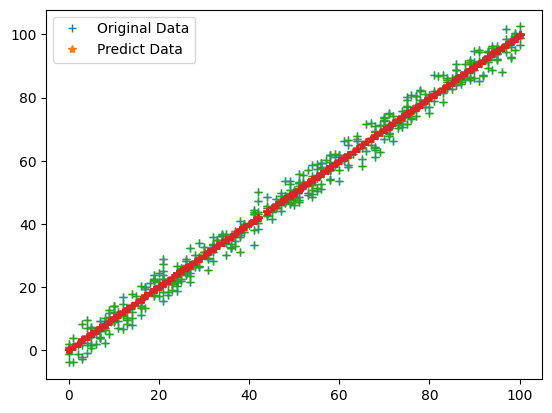

 76%|███████▌  | 151/200 [01:25<00:25,  1.96it/s]

Loss at the 152 iteration is 3.9276479951963195


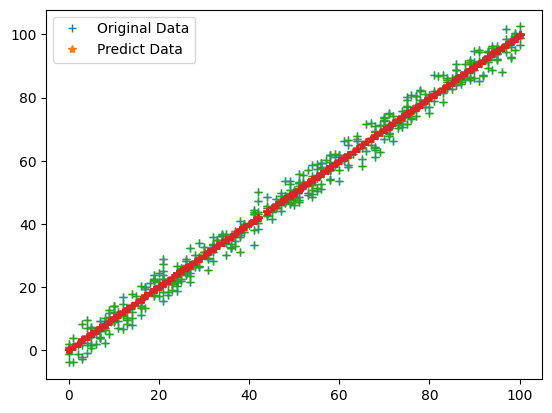

 76%|███████▌  | 152/200 [01:26<00:25,  1.90it/s]

Loss at the 153 iteration is 3.9276471243580864


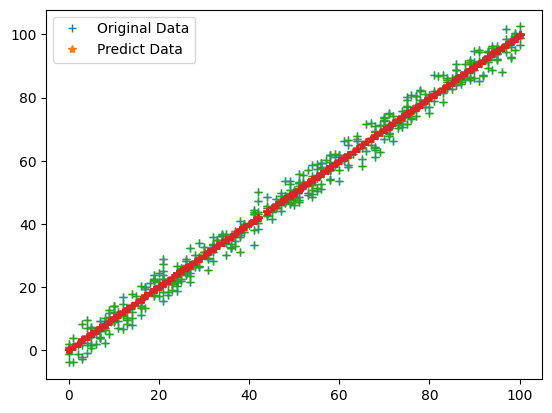

 76%|███████▋  | 153/200 [01:26<00:21,  2.20it/s]

Loss at the 154 iteration is 3.92764625356372


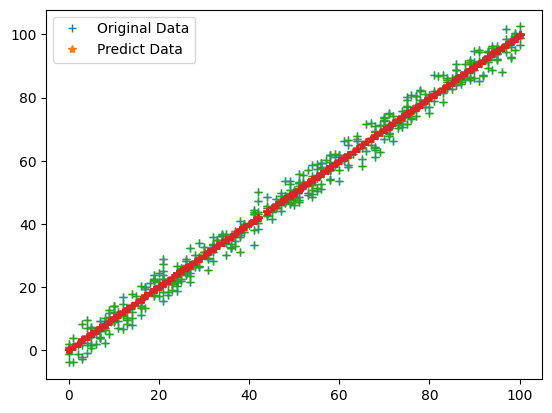

 77%|███████▋  | 154/200 [01:26<00:18,  2.47it/s]

Loss at the 155 iteration is 3.927645382813219


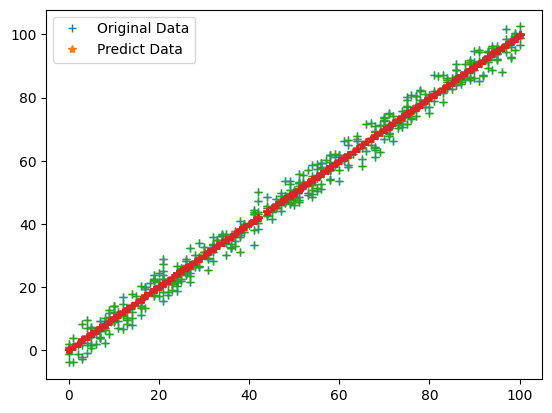

 78%|███████▊  | 155/200 [01:27<00:24,  1.81it/s]

Loss at the 156 iteration is 3.9276445121065797


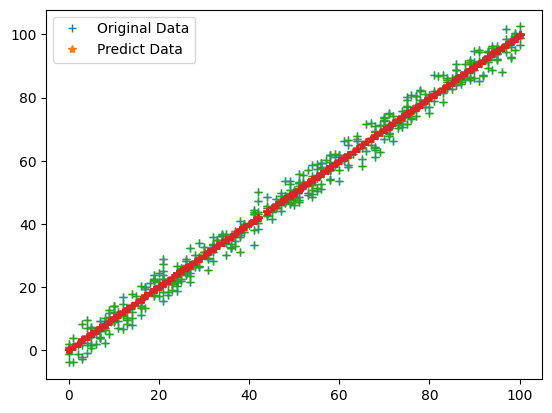

 78%|███████▊  | 156/200 [01:28<00:29,  1.48it/s]

Loss at the 157 iteration is 3.9276436414438027


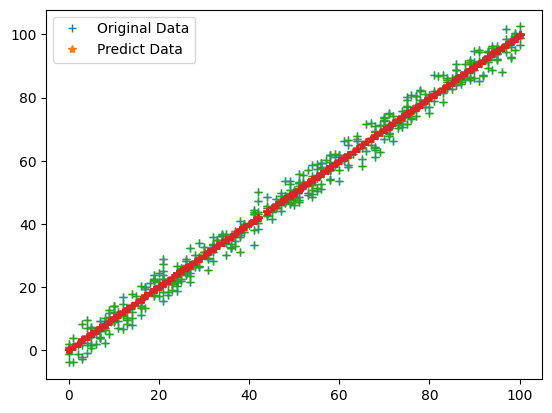

 78%|███████▊  | 157/200 [01:29<00:25,  1.68it/s]

Loss at the 158 iteration is 3.927642770824883


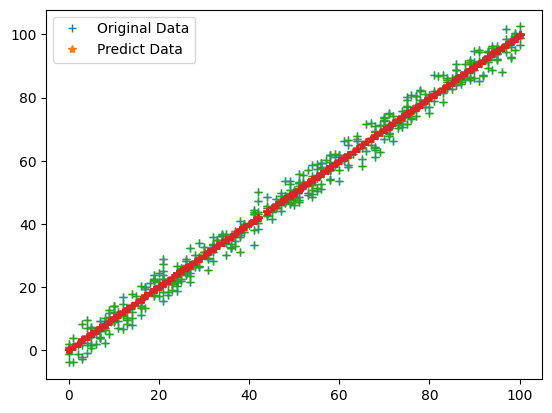

 79%|███████▉  | 158/200 [01:29<00:21,  1.95it/s]

Loss at the 159 iteration is 3.9276419002498177


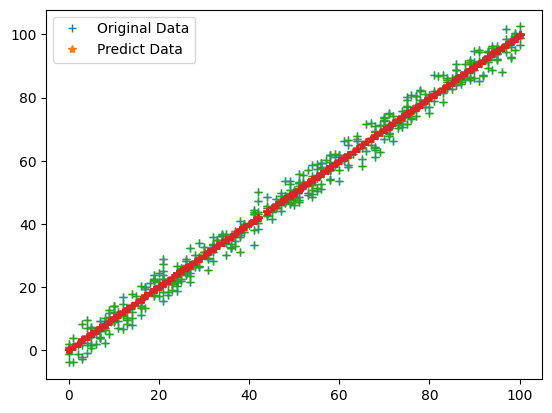

 80%|███████▉  | 159/200 [01:29<00:18,  2.21it/s]

Loss at the 160 iteration is 3.9276410297186075


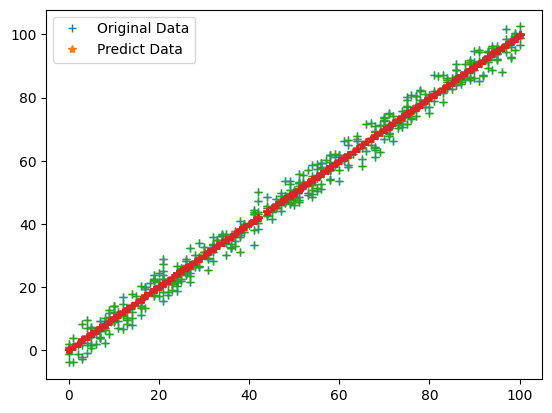

 80%|████████  | 160/200 [01:30<00:24,  1.62it/s]

Loss at the 161 iteration is 3.9276401592312493


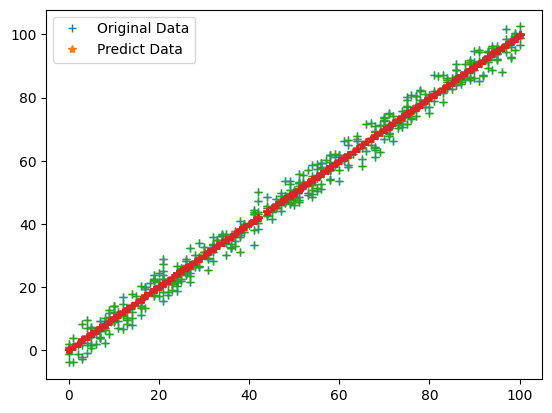

 80%|████████  | 161/200 [01:31<00:27,  1.40it/s]

Loss at the 162 iteration is 3.92763928878774


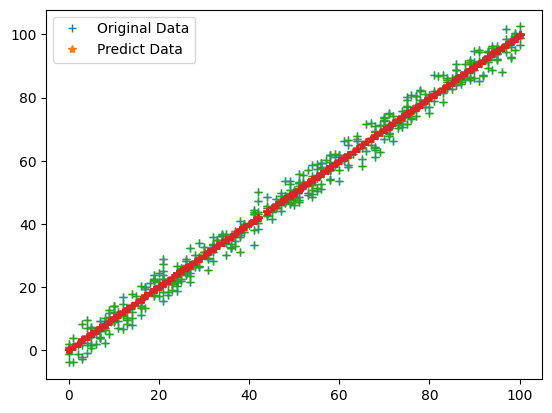

 81%|████████  | 162/200 [01:32<00:23,  1.61it/s]

Loss at the 163 iteration is 3.9276384183880775


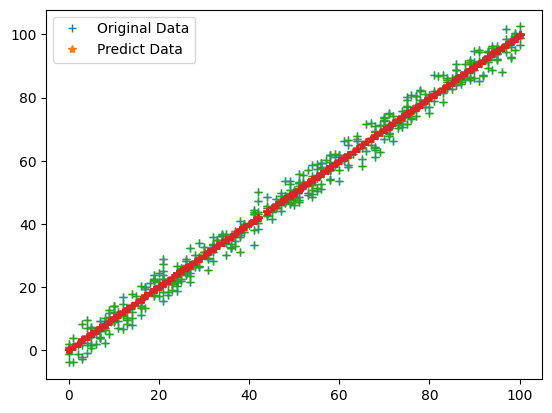

 82%|████████▏ | 163/200 [01:32<00:20,  1.85it/s]

Loss at the 164 iteration is 3.9276375480322594


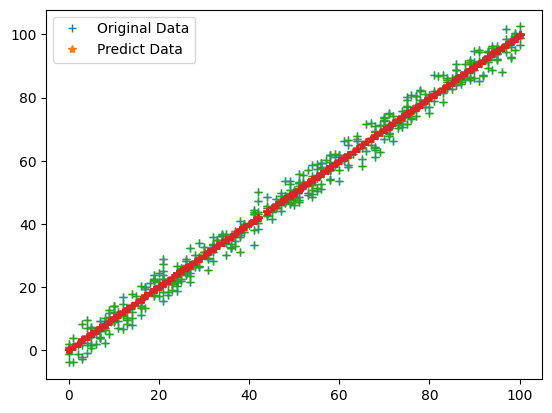

 82%|████████▏ | 164/200 [01:32<00:17,  2.06it/s]

Loss at the 165 iteration is 3.927636677720286


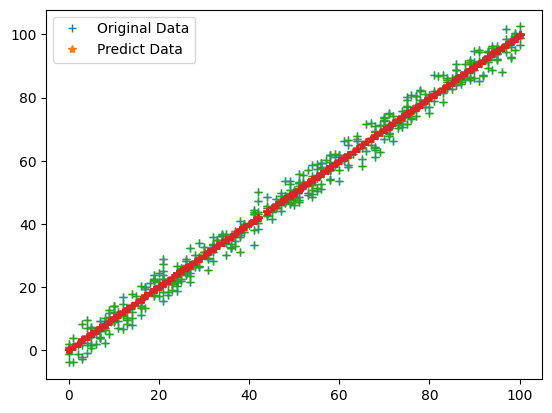

 82%|████████▎ | 165/200 [01:33<00:22,  1.56it/s]

Loss at the 166 iteration is 3.9276358074521514


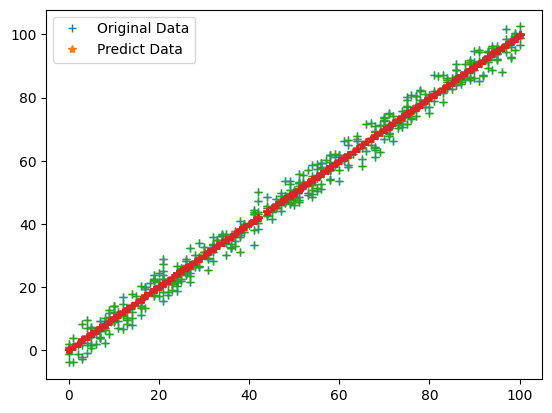

 83%|████████▎ | 166/200 [01:34<00:25,  1.36it/s]

Loss at the 167 iteration is 3.927634937227856


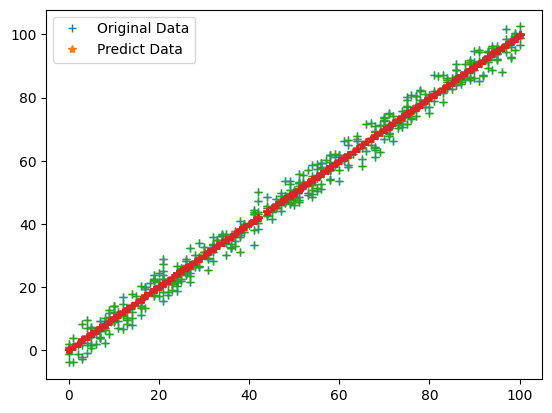

 84%|████████▎ | 167/200 [01:36<00:28,  1.16it/s]

Loss at the 168 iteration is 3.927634067047395


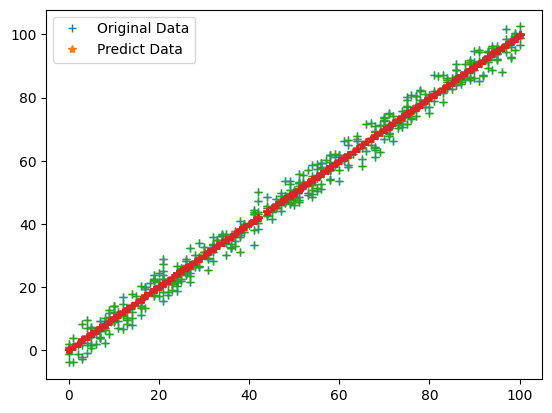

 84%|████████▍ | 168/200 [01:36<00:27,  1.18it/s]

Loss at the 169 iteration is 3.9276331969107696


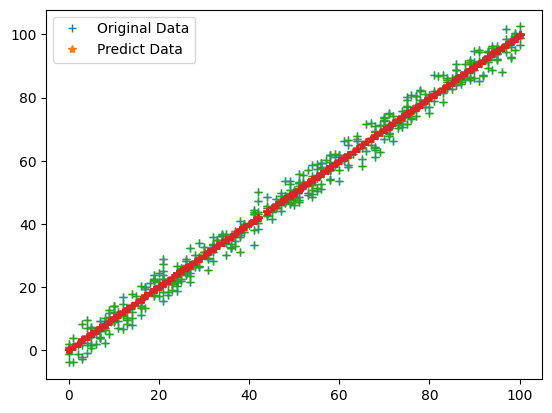

 84%|████████▍ | 169/200 [01:37<00:27,  1.14it/s]

Loss at the 170 iteration is 3.9276323268179754


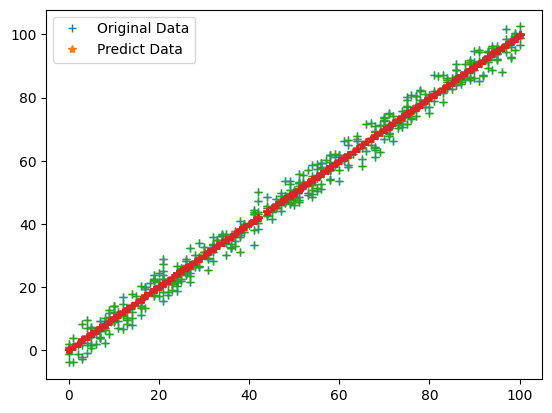

 85%|████████▌ | 170/200 [01:38<00:22,  1.35it/s]

Loss at the 171 iteration is 3.9276314567690105


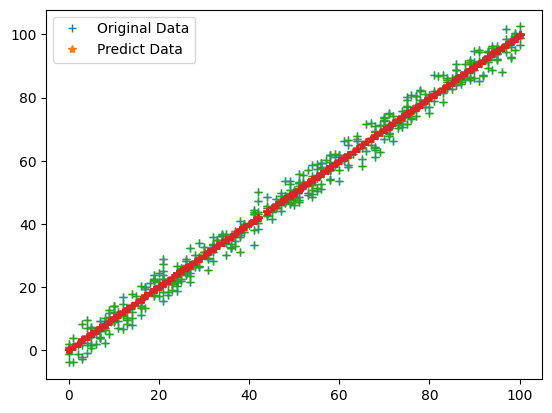

 86%|████████▌ | 171/200 [01:38<00:17,  1.68it/s]

Loss at the 172 iteration is 3.9276305867638737


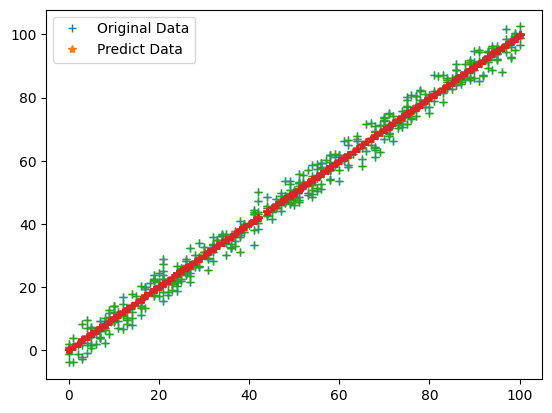

 86%|████████▌ | 172/200 [01:38<00:14,  1.99it/s]

Loss at the 173 iteration is 3.927629716802561


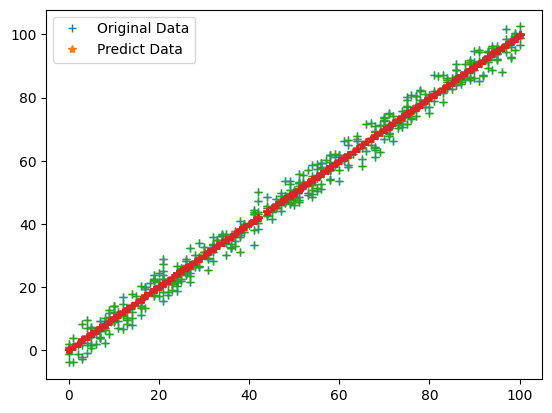

 86%|████████▋ | 173/200 [01:39<00:12,  2.22it/s]

Loss at the 174 iteration is 3.927628846885071


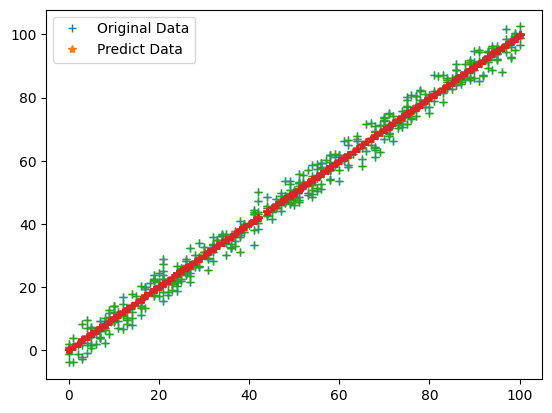

 87%|████████▋ | 174/200 [01:39<00:14,  1.84it/s]

Loss at the 175 iteration is 3.9276279770114026


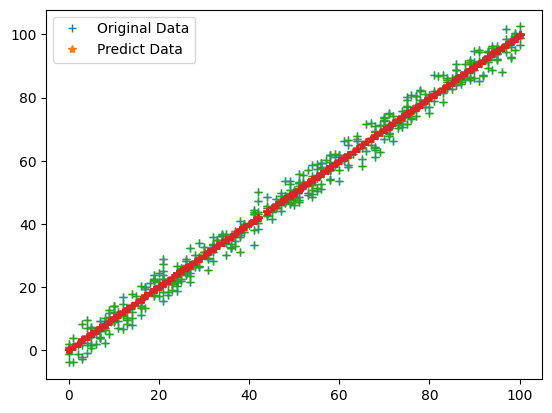

 88%|████████▊ | 175/200 [01:40<00:16,  1.50it/s]

Loss at the 176 iteration is 3.9276271071815514


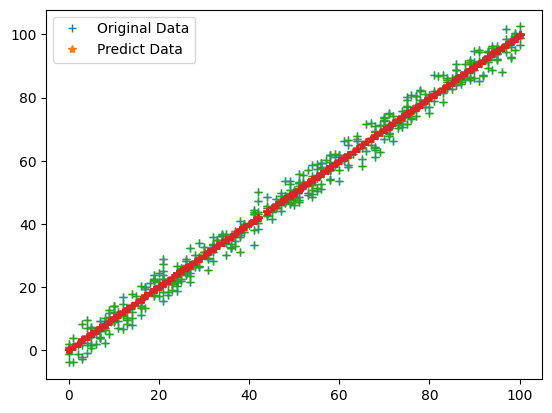

 88%|████████▊ | 176/200 [01:41<00:14,  1.69it/s]

Loss at the 177 iteration is 3.927626237395517


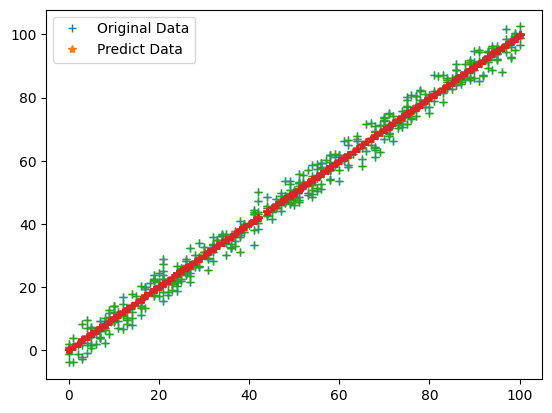

 88%|████████▊ | 177/200 [01:41<00:11,  1.95it/s]

Loss at the 178 iteration is 3.9276253676532966


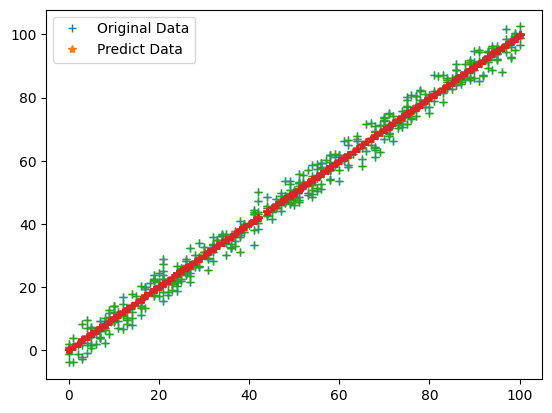

 89%|████████▉ | 178/200 [01:41<00:10,  2.15it/s]

Loss at the 179 iteration is 3.927624497954888


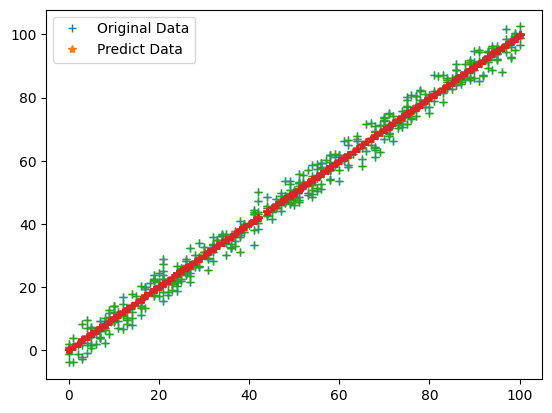

 90%|████████▉ | 179/200 [01:42<00:12,  1.63it/s]

Loss at the 180 iteration is 3.927623628300289


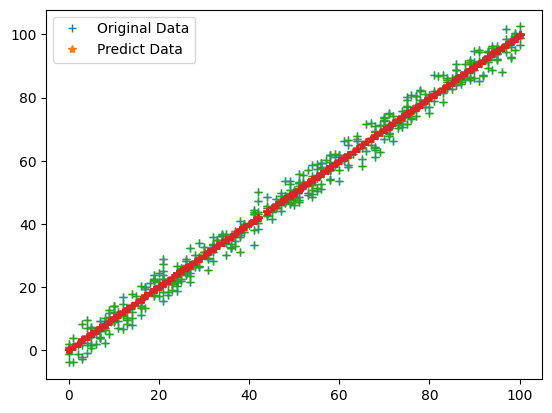

 90%|█████████ | 180/200 [01:43<00:14,  1.41it/s]

Loss at the 181 iteration is 3.927622758689497


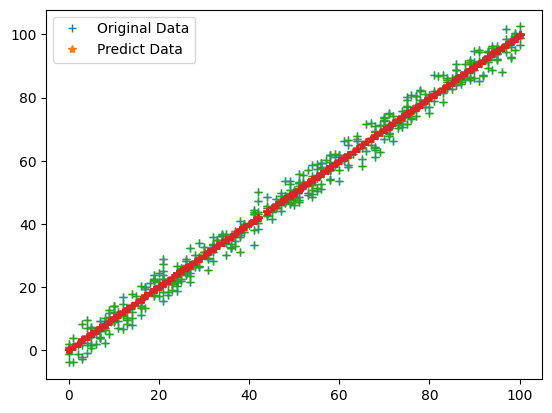

 90%|█████████ | 181/200 [01:44<00:11,  1.59it/s]

Loss at the 182 iteration is 3.927621889122512


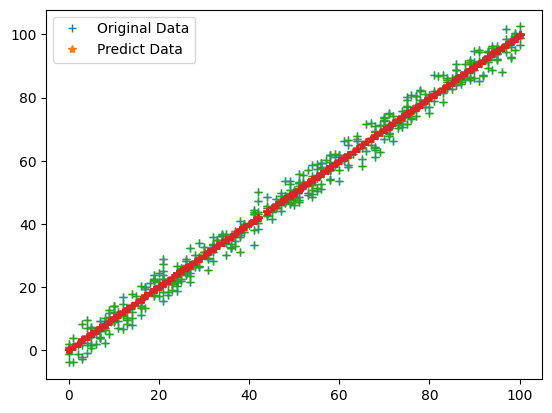

 91%|█████████ | 182/200 [01:44<00:10,  1.71it/s]

Loss at the 183 iteration is 3.927621019599328


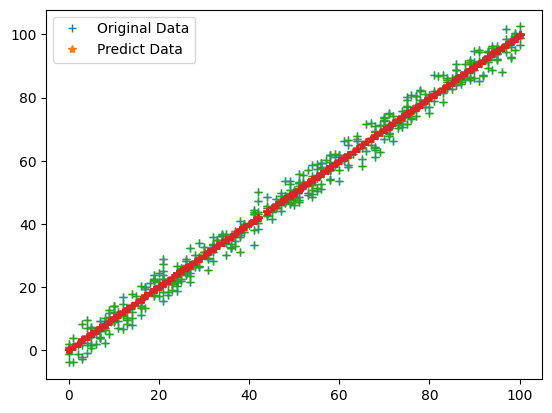

 92%|█████████▏| 183/200 [01:45<00:09,  1.82it/s]

Loss at the 184 iteration is 3.927620150119946


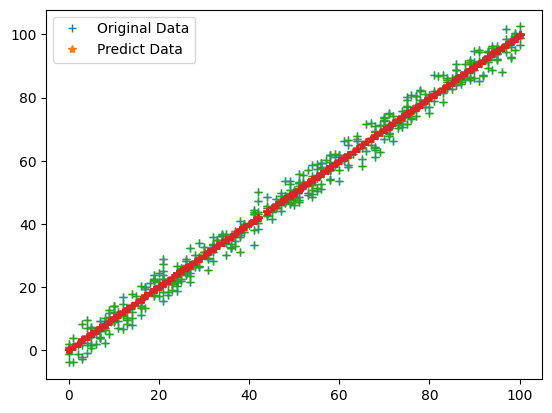

 92%|█████████▏| 184/200 [01:45<00:07,  2.09it/s]

Loss at the 185 iteration is 3.927619280684361


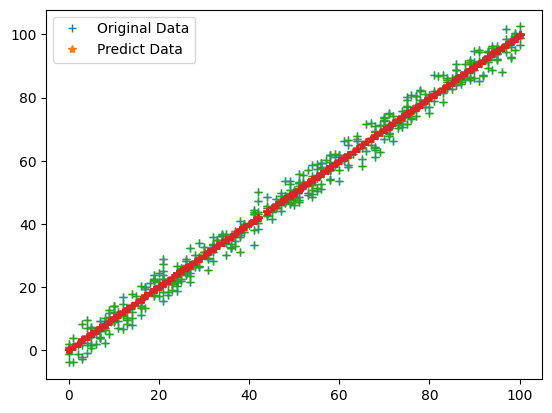

 92%|█████████▎| 185/200 [01:45<00:06,  2.31it/s]

Loss at the 186 iteration is 3.927618411292573


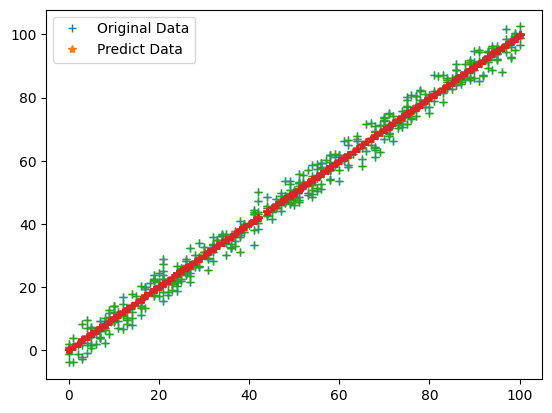

 93%|█████████▎| 186/200 [01:46<00:05,  2.38it/s]

Loss at the 187 iteration is 3.9276175419445796


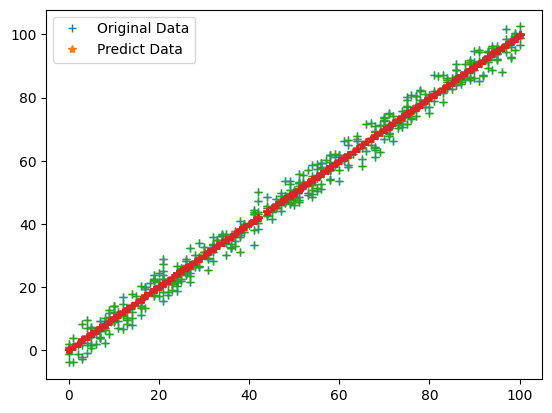

 94%|█████████▎| 187/200 [01:46<00:04,  2.62it/s]

Loss at the 188 iteration is 3.927616672640378


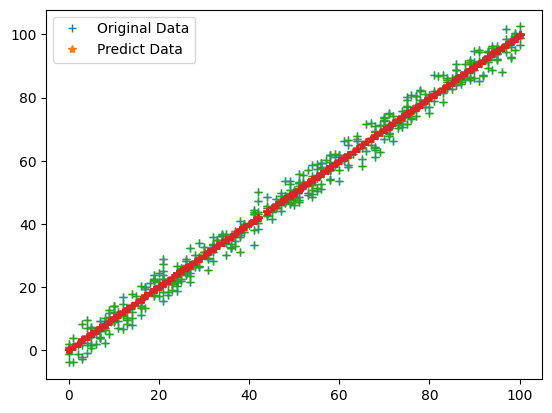

 94%|█████████▍| 188/200 [01:46<00:04,  2.61it/s]

Loss at the 189 iteration is 3.9276158033799664


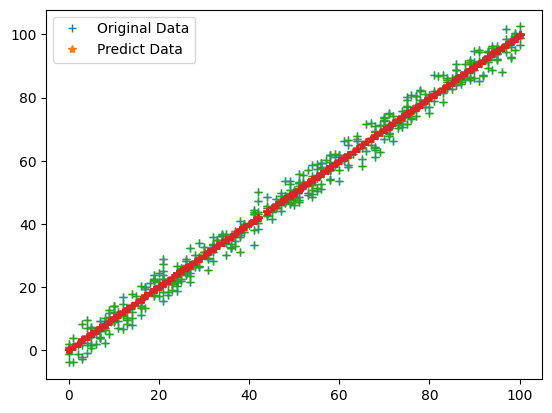

 94%|█████████▍| 189/200 [01:47<00:06,  1.74it/s]

Loss at the 190 iteration is 3.9276149341633415


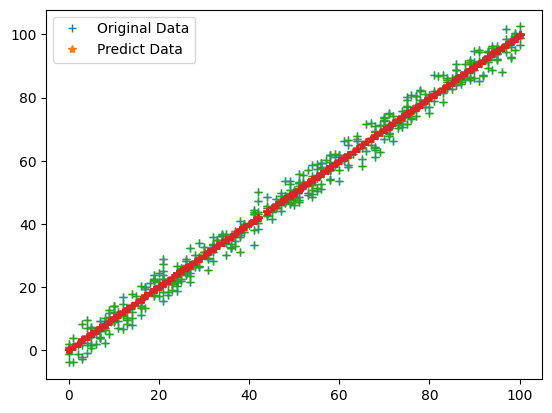

 95%|█████████▌| 190/200 [01:48<00:06,  1.45it/s]

Loss at the 191 iteration is 3.927614064990503


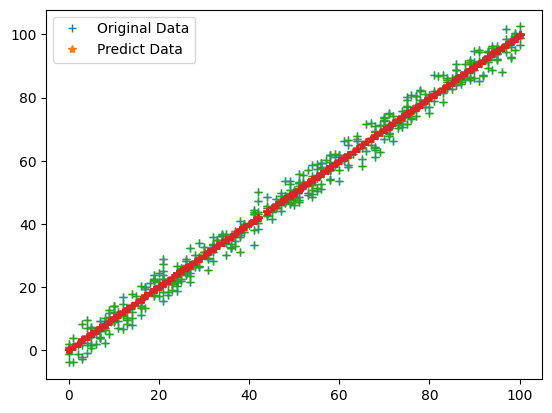

 96%|█████████▌| 191/200 [01:49<00:07,  1.27it/s]

Loss at the 192 iteration is 3.927613195861446


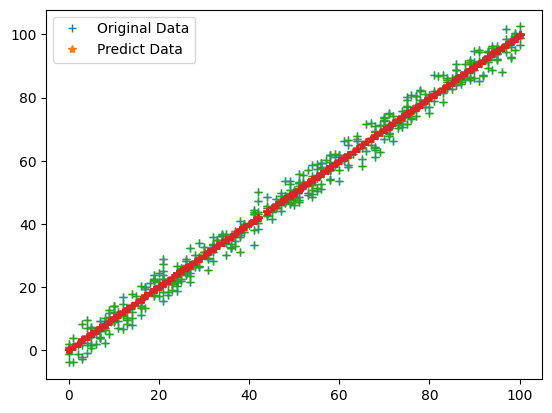

 96%|█████████▌| 192/200 [01:50<00:06,  1.20it/s]

Loss at the 193 iteration is 3.9276123267761713


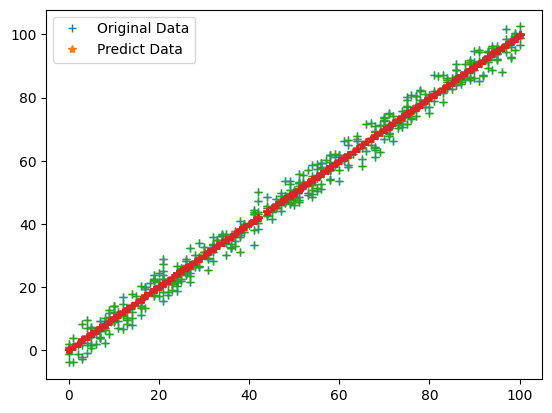

 96%|█████████▋| 193/200 [01:51<00:04,  1.41it/s]

Loss at the 194 iteration is 3.9276114577346743


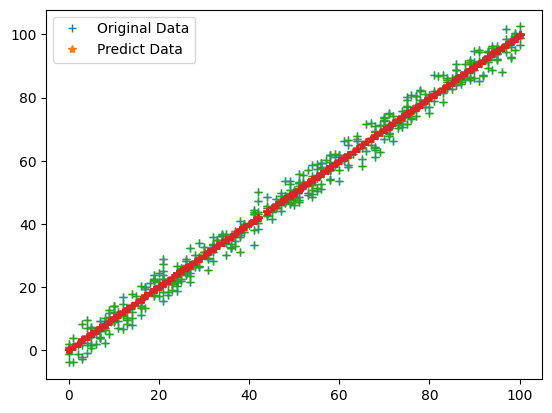

 97%|█████████▋| 194/200 [01:51<00:03,  1.71it/s]

Loss at the 195 iteration is 3.927610588736955


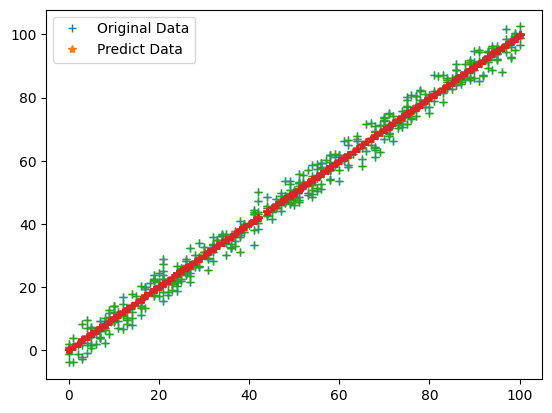

 98%|█████████▊| 195/200 [01:51<00:02,  1.98it/s]

Loss at the 196 iteration is 3.92760971978301


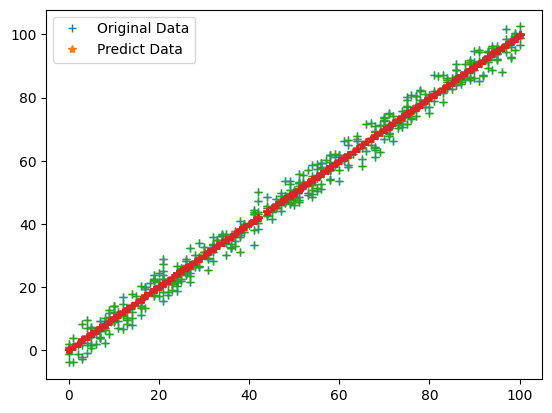

 98%|█████████▊| 196/200 [01:52<00:02,  1.58it/s]

Loss at the 197 iteration is 3.9276088508728364


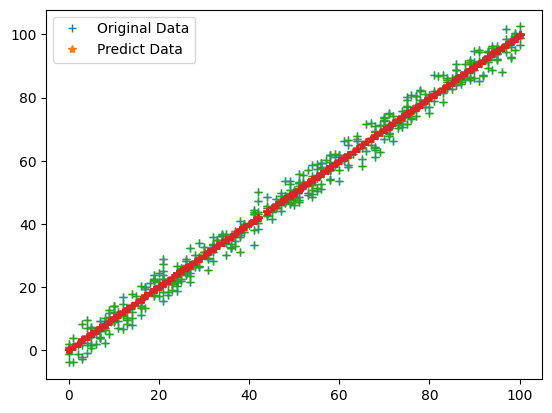

 98%|█████████▊| 197/200 [01:53<00:01,  1.63it/s]

Loss at the 198 iteration is 3.9276079820064322


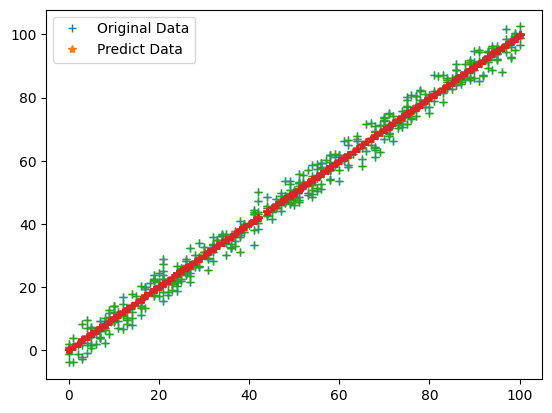

 99%|█████████▉| 198/200 [01:53<00:01,  1.88it/s]

Loss at the 199 iteration is 3.927607113183797


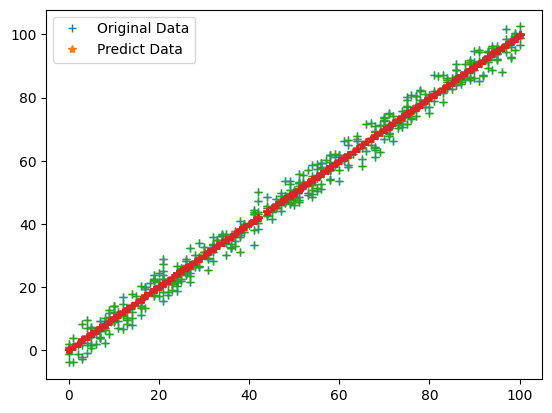

100%|█████████▉| 199/200 [01:54<00:00,  1.40it/s]

Loss at the 200 iteration is 3.9276062444049256


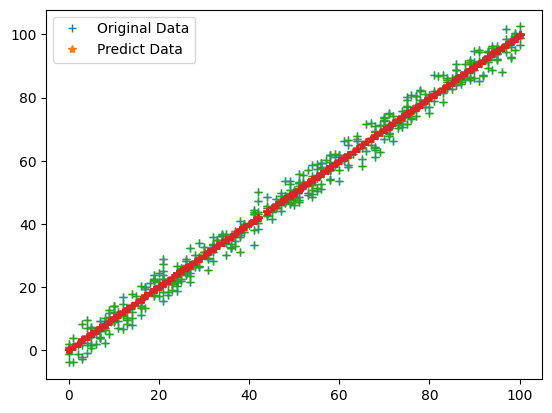

100%|██████████| 200/200 [01:55<00:00,  1.73it/s]


In [19]:
parameter,loss=train(train_input,train_output,0.0001,200)

In [20]:
def train_2(train_input,train_output,learning_rate,iter):
  # Random Parameter
  parameter=dict()
  parameter["m"]=np.random.uniform(0,1)
  parameter["c"]=np.random.uniform(0,1)
  plt.figure()
  loss=list()
  for i in tqdm(range(iter)):
    predict=forward_propagation(train_input,parameter)
    cst=cost_function(train_output,predict)
    loss.append(cst)
    # print(f"Loss at the {i+1} iteration is {cst}")
    derivate=backward_propagation(train_input,train_output,predict)
    parameter=update_param(parameter,derivate,learning_rate)

  plt.plot(train_input,train_output,"+",label="Original Data")
  plt.plot(train_input,predict,"*",label="Predict Data")
  plt.legend()
  plt.show()
  print(loss[-1])
  # return parameter,loss

100%|██████████| 20000000/20000000 [25:41<00:00, 12977.31it/s]


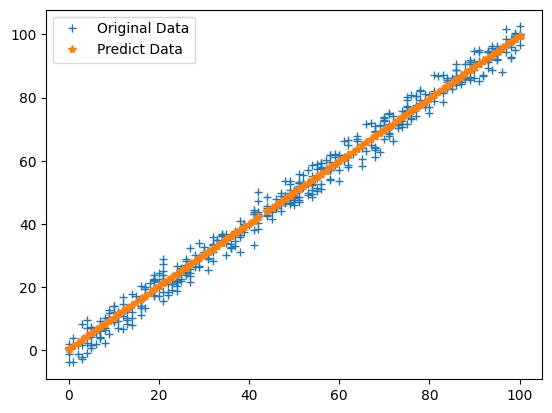

3.969224145415373


In [21]:
train_2(train_input,train_output,0.0000001,20000000)

## Lets Predict

In [22]:
test_predict=test_input*parameter["m"]+parameter["c"]

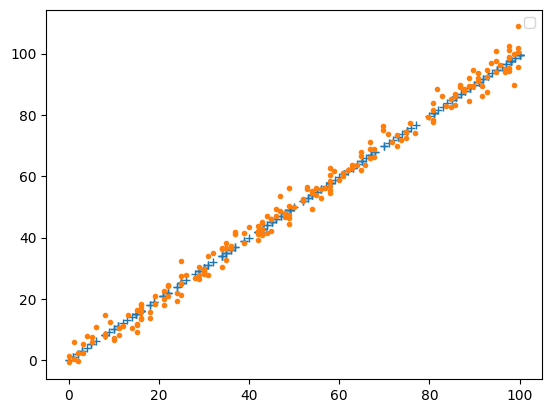

In [23]:
plt.plot(test_input,test_predict,"+")
plt.plot(test_predict,test_output,".")
plt.legend()
plt.show()

## Cost of Prediction

In [24]:
cost_function(test_output,test_predict)

3.991139406880654

## Using SKLearn Library

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr_model=LinearRegression()
lr_model.fit(train_input,train_output)
print("Coefficient : ",lr_model.coef_)
print("Intercept : ",lr_model.intercept_)

Coefficient :  [[1.0009993]]
Intercept :  [-0.23603461]


In [27]:
test_predictions=lr_model.predict(test_input)

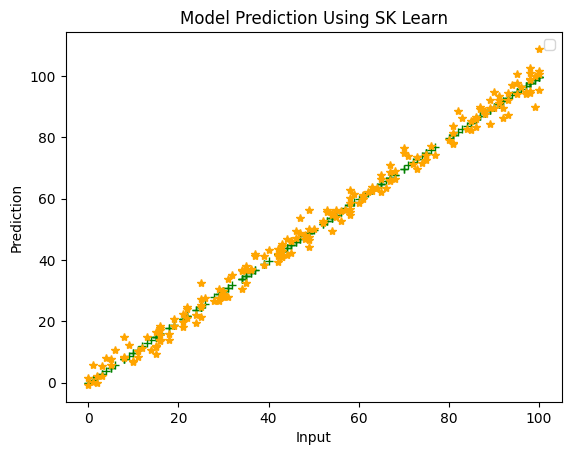

In [28]:
plt.plot(test_input,test_predictions,"+",color="green")
plt.plot(test_input,test_output,"*",color="orange")
plt.legend()
plt.title('Model Prediction Using SK Learn')
plt.xlabel('Input')
plt.ylabel('Prediction')
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error
cost=mean_squared_error(test_output,test_predictions)
print(cost)

8.030031591835378
